<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Project <br>
<font color=696880 size=4>
    Project Team 
    
    
____


### Full Name : Amirhosein Rahmati - Ali Nazari
### Student Number : 
___

# Introduction

In this project, we are going to have a brief and elementary hands-on real-world project, predicting breast cancer survival using machine learning models with clinical data and gene expression profiles.

# Data Documentation

For this purpose, we will use "Breast Cancer Gene Expression Profiles (METABRIC)" data. 
The first 31 columns of data contain clinical information including death status.
The next columns of the data contain gene's related information which includes both gene expressions and mutation information. (gene's mutation info columns have been marked with "_mut" at the end of the names of the columns) 
For more information please read the [data documentation](https://www.kaggle.com/datasets/raghadalharbi/breast-cancer-gene-expression-profiles-metabric).

# Data Preparation (15 Points)

In this section you must first split data into three datasets:
<br>
1- clinical dataset
<br>
2- gene expressions dataset
<br>
3- gene mutation dataset. (We will not use this dataset in further steps of the project)

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, datasets

from tqdm import tqdm
from sklearn.metrics import confusion_matrix
import seaborn as sn

## Data Loading & Splitting

In [165]:
df = pd.read_csv('METABRIC_RNA_Mutation.csv')
df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (678,688,690,692) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [166]:
clinical_section_total = df.iloc[:, :31]
clinical_section_total = clinical_section_total.drop('death_from_cancer', axis=1)

gene_expression_total = df.iloc[:, 31:520]
gene_expression_total = pd.concat([gene_expression_total, df.iloc[:, 24]], axis=1)

gene_mutation_total = df.iloc[:, 520:]
gene_mutation_total = pd.concat([gene_mutation_total, df.iloc[:, 24]], axis=1)

In [167]:
x_clinical_section = clinical_section_total.iloc[:, :24]
x_clinical_section = pd.concat([x_clinical_section, clinical_section_total.iloc[:, 25:]], axis=1)
y_clinical_section = clinical_section_total.iloc[:, 24]

x_gene_expression = gene_expression_total.iloc[:, :-1]
y_gene_expression = gene_expression_total.iloc[:, -1]

x_gene_mutation = gene_mutation_total.iloc[:, :-1]
y_gene_mutation = gene_mutation_total.iloc[:, -1]

In [168]:
x_train_clinical_section, x_test_clinical_section, y_train_clinical_section, y_test_clinical_section = train_test_split(x_clinical_section, y_clinical_section, test_size=0.2, random_state=0)

x_train_gene_expression, x_test_gene_expression, y_train_gene_expression, y_test_gene_expression = train_test_split(x_gene_expression, y_gene_expression, test_size=0.2, random_state=0)

x_train_gene_mutation, x_test_gene_mutation, y_train_gene_mutation, y_test_gene_mutation = train_test_split(x_gene_mutation, y_gene_mutation, test_size=0.2, random_state=0)

## EDA

For each dataset, you must perform a sufficient EDA.

# clinical section EDA

In [169]:
clinical_section_total.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,NaN,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,2.0,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,2.0,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,1.0,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,2.0,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0


In [170]:
clinical_section_total.columns

Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       'er_status', 'neoplasm_histologic_grade',
       'her2_status_measured_by_snp6', 'her2_status',
       'tumor_other_histologic_subtype', 'hormone_therapy',
       'inferred_menopausal_state', 'integrative_cluster',
       'primary_tumor_laterality', 'lymph_nodes_examined_positive',
       'mutation_count', 'nottingham_prognostic_index', 'oncotree_code',
       'overall_survival_months', 'overall_survival', 'pr_status',
       'radio_therapy', '3-gene_classifier_subtype', 'tumor_size',
       'tumor_stage'],
      dtype='object')

In [171]:
clinical_section_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   patient_id                      1904 non-null   int64  
 1   age_at_diagnosis                1904 non-null   float64
 2   type_of_breast_surgery          1882 non-null   object 
 3   cancer_type                     1904 non-null   object 
 4   cancer_type_detailed            1889 non-null   object 
 5   cellularity                     1850 non-null   object 
 6   chemotherapy                    1904 non-null   int64  
 7   pam50_+_claudin-low_subtype     1904 non-null   object 
 8   cohort                          1904 non-null   float64
 9   er_status_measured_by_ihc       1874 non-null   object 
 10  er_status                       1904 non-null   object 
 11  neoplasm_histologic_grade       1832 non-null   float64
 12  her2_status_measured_by_snp6    19

In [172]:
clinical_section_total.corr()

,patient_id,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,tumor_size,tumor_stage
patient_id,1.000000,0.030515,-0.150650,0.934412,-0.016458,-0.091268,-0.043399,0.247794,-0.047329,0.099731,-0.148052,-0.174721,-0.004435,-0.090215
age_at_diagnosis,0.030515,1.000000,-0.416691,0.061239,-0.114217,0.287206,-0.006782,0.011967,-0.088429,-0.150158,-0.303666,-0.134538,0.047493,0.085898
chemotherapy,-0.150650,-0.416691,1.000000,-0.132732,0.286386,-0.162809,0.283678,-0.065953,0.430875,-0.159951,0.045625,0.228283,0.195716,0.338272
cohort,0.934412,0.061239,-0.132732,1.000000,-0.051750,-0.116918,-0.026163,0.227385,-0.055199,0.089101,-0.149645,-0.220674,0.017526,-0.071004
neoplasm_histologic_grade,-0.016458,-0.114217,0.286386,-0.051750,1.000000,-0.050810,0.149359,0.044543,0.720531,-0.121632,-0.086601,0.142392,0.134397,0.178901
hormone_therapy,-0.091268,0.287206,-0.162809,-0.116918,-0.050810,1.000000,0.129111,-0.133947,0.134183,-0.105786,-0.030401,0.087940,0.061531,0.220105
lymph_nodes_examined_positive,-0.043399,-0.006782,0.283678,-0.026163,0.149359,0.129111,1.000000,-0.048685,0.563086,-0.240319,-0.164498,0.127224,0.264665,0.446636
mutation_count,0.247794,0.011967,-0.065953,0.227385,0.044543,-0.133947,-0.048685,1.000000,-0.001376,0.041647,-0.077741,-0.091845,0.018206,-0.024030
nottingham_prognostic_index,-0.047329,-0.088429,0.430875,-0.055199,0.720531,0.134183,0.563086,-0.001376,1.000000,-0.242773,-0.138000,0.221926,0.279806,0.547172
overall_survival_months,0.099731,-0.150158,-0.159951,0.089101,-0.121632,-0.105786,-0.240319,0.041647,-0.242773,1.000000,0.384467,-0.005822,-0.188135,-0.273498


In [173]:
clinical_section_total['cancer_type'].value_counts()

Breast Cancer     1903
Breast Sarcoma       1
Name: cancer_type, dtype: int64

In [174]:
clinical_section_total.describe()

,patient_id,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,tumor_size,tumor_stage
count,1904.000000,1904.000000,1904.000000,1904.000000,1832.000000,1904.000000,1904.000000,1859.000000,1904.000000,1904.000000,1904.000000,1904.000000,1884.000000,1403.000000
mean,3921.982143,61.087054,0.207983,2.643908,2.415939,0.616597,2.002101,5.697687,4.033019,125.121324,0.420693,0.597164,26.238726,1.750535
std,2358.478332,12.978711,0.405971,1.228615,0.650612,0.486343,4.079993,4.058778,1.144492,76.334148,0.493800,0.490597,15.160976,0.628999
min,0.000000,21.930000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,896.500000,51.375000,0.000000,1.000000,2.000000,0.000000,0.000000,3.000000,3.046000,60.825000,0.000000,0.000000,17.000000,1.000000
50%,4730.500000,61.770000,0.000000,3.000000,3.000000,1.000000,0.000000,5.000000,4.042000,115.616667,0.000000,1.000000,23.000000,2.000000
75%,5536.250000,70.592500,0.000000,3.000000,3.000000,1.000000,2.000000,7.000000,5.040250,184.716667,1.000000,1.000000,30.000000,2.000000
max,7299.000000,96.290000,1.000000,5.000000,3.000000,1.000000,45.000000,80.000000,6.360000,355.200000,1.000000,1.000000,182.000000,4.000000


In [175]:
clinical_section_total.isna().sum()

patient_id                          0
age_at_diagnosis                    0
type_of_breast_surgery             22
cancer_type                         0
cancer_type_detailed               15
cellularity                        54
chemotherapy                        0
pam50_+_claudin-low_subtype         0
cohort                              0
er_status_measured_by_ihc          30
er_status                           0
neoplasm_histologic_grade          72
her2_status_measured_by_snp6        0
her2_status                         0
tumor_other_histologic_subtype     15
hormone_therapy                     0
inferred_menopausal_state           0
integrative_cluster                 0
primary_tumor_laterality          106
lymph_nodes_examined_positive       0
mutation_count                     45
nottingham_prognostic_index         0
oncotree_code                      15
overall_survival_months             0
overall_survival                    0
pr_status                           0
radio_therap

In [176]:
pd.crosstab(clinical_section_total.tumor_stage, clinical_section_total.type_of_breast_surgery)

type_of_breast_surgery,BREAST CONSERVING,MASTECTOMY
tumor_stage,,
0.0,2,1
1.0,277,196
2.0,288,503
3.0,22,90
4.0,1,7


In [177]:
pd.crosstab(clinical_section_total.type_of_breast_surgery, clinical_section_total.type_of_breast_surgery)

type_of_breast_surgery,BREAST CONSERVING,MASTECTOMY
type_of_breast_surgery,,
BREAST CONSERVING,755,0
MASTECTOMY,0,1127


In [178]:
clinical_section_total.groupby(["pr_status", "type_of_breast_surgery"])[["age_at_diagnosis"]].mean()

age_at_diagnosis
pr_status type_of_breast_surgery                  
Negative  BREAST CONSERVING              58.112124
          MASTECTOMY                     61.226556
Positive  BREAST CONSERVING              60.045361
          MASTECTOMY                     63.618116

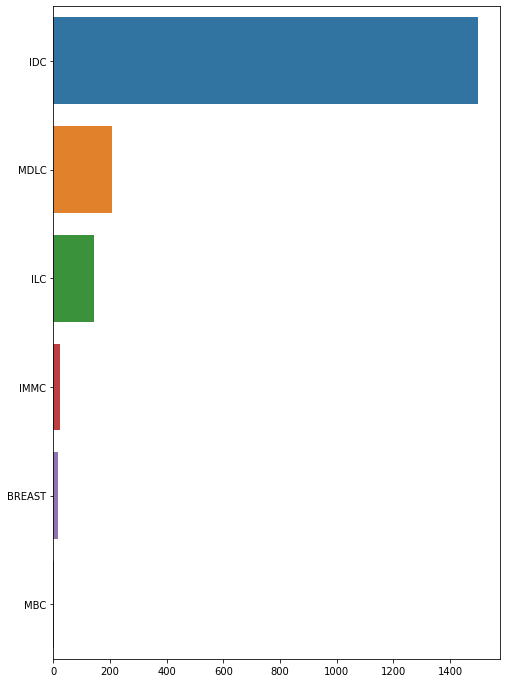

In [179]:
temp = clinical_section_total["oncotree_code"].value_counts()
fig, ax = plt.subplots(figsize=(8, 12))
sns.barplot(x=temp.values, y=temp.index, ax=ax)

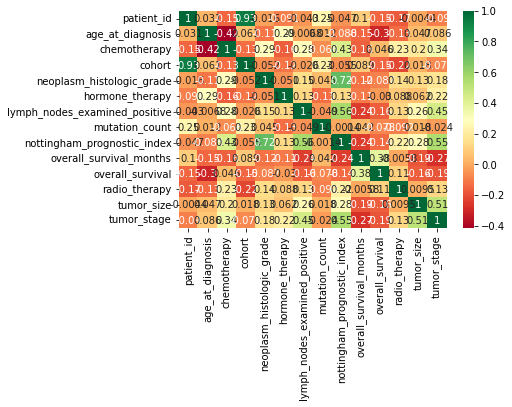

In [180]:
sns.heatmap(clinical_section_total.corr(), annot=True, cmap="RdYlGn")

# Gene expression section

In [181]:
gene_expression_total.head()

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7,overall_survival
0,-1.3990,-0.5738,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,-0.8578,...,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354,1
1,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,-2.6059,...,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920,1
2,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,-1.1305,...,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655,0
3,0.6744,-0.5428,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,-0.6165,...,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828,1
4,1.2932,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,...,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223,0


In [182]:
gene_expression_total.columns

Index(['brca1', 'brca2', 'palb2', 'pten', 'tp53', 'atm', 'cdh1', 'chek2',
       'nbn', 'nf1',
       ...
       'srd5a2', 'srd5a3', 'st7', 'star', 'tnk2', 'tulp4', 'ugt2b15',
       'ugt2b17', 'ugt2b7', 'overall_survival'],
      dtype='object', length=490)

In [183]:
gene_expression_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 490 entries, brca1 to overall_survival
dtypes: float64(489), int64(1)
memory usage: 7.1 MB


In [184]:
gene_expression_total.corr()

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7,overall_survival
brca1,1.000000,0.018239,0.156522,-0.129142,-0.011258,-0.056974,0.067219,0.157144,0.020113,0.228278,...,0.014618,0.084991,-0.003348,0.032215,0.079484,0.072880,-0.036948,0.018155,-0.116273,-0.074201
brca2,0.018239,1.000000,-0.064225,-0.018828,-0.015869,-0.018035,-0.026587,0.040291,-0.006338,-0.046055,...,0.013568,0.076958,-0.094785,-0.038025,-0.113109,-0.109329,-0.051905,0.003594,-0.030113,-0.000060
palb2,0.156522,-0.064225,1.000000,-0.038559,0.136438,-0.003831,0.015281,0.155800,-0.020078,0.162054,...,0.009493,-0.082784,0.102661,0.015800,-0.039579,0.098559,-0.028838,-0.027141,-0.060965,-0.033321
pten,-0.129142,-0.018828,-0.038559,1.000000,-0.027153,0.010648,-0.091812,-0.357487,-0.065451,0.086580,...,-0.073897,-0.066399,0.061936,0.007487,-0.038282,0.125287,0.063371,0.042759,0.045285,0.023058
tp53,-0.011258,-0.015869,0.136438,-0.027153,1.000000,-0.023451,0.059892,0.114143,0.030933,0.089346,...,0.004997,-0.069545,0.098283,0.083523,-0.066101,0.048964,0.023309,-0.017876,-0.001547,0.058167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tulp4,0.072880,-0.109329,0.098559,0.125287,0.048964,-0.062376,0.053877,-0.109810,-0.009753,0.271502,...,-0.011423,-0.110570,0.068528,-0.000532,0.270836,1.000000,0.021011,0.025788,-0.031024,-0.080796
ugt2b15,-0.036948,-0.051905,-0.028838,0.063371,0.023309,0.010763,0.118048,0.008507,-0.045080,-0.042510,...,-0.014631,0.032544,0.174704,-0.028065,-0.119171,0.021011,1.000000,0.418910,0.453817,0.075962
ugt2b17,0.018155,0.003594,-0.027141,0.042759,-0.017876,0.020971,0.019731,0.002002,-0.032007,-0.011088,...,-0.026837,0.047827,0.089233,-0.030729,-0.037465,0.025788,0.418910,1.000000,0.180430,0.045970
ugt2b7,-0.116273,-0.030113,-0.060965,0.045285,-0.001547,-0.025340,0.054575,-0.089660,-0.011871,-0.022703,...,0.050185,0.120295,0.122909,0.006014,-0.107429,-0.031024,0.453817,0.180430,1.000000,0.020564


In [185]:
gene_expression_total.describe()

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7,overall_survival
count,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03,1.904000e+03,1904.000000,...,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03,1904.000000
mean,-6.302521e-07,-4.201681e-07,3.676471e-07,-8.928571e-07,6.302521e-07,-2.100840e-07,0.000002,7.463684e-18,-3.676471e-07,-0.000001,...,-3.676471e-07,-9.453782e-07,-1.050420e-07,-0.000002,3.676471e-07,4.726891e-07,7.878151e-07,0.000000,3.731842e-18,0.420693
std,1.000262e+00,1.000262e+00,1.000263e+00,1.000263e+00,1.000263e+00,1.000262e+00,1.000263,1.000262e+00,1.000263e+00,1.000262,...,1.000262e+00,1.000262e+00,1.000263e+00,1.000262,1.000264e+00,1.000262e+00,1.000263e+00,1.000262,1.000262e+00,0.493800
min,-2.444400e+00,-2.783500e+00,-4.384600e+00,-5.932800e+00,-2.481200e+00,-3.170500e+00,-3.323700,-2.688700e+00,-3.689800e+00,-2.968600,...,-3.364800e+00,-2.719400e+00,-4.982700e+00,-2.981700,-3.833300e+00,-3.609300e+00,-1.166900e+00,-2.112600,-1.051600e+00,0.000000
25%,-7.198500e-01,-6.994750e-01,-6.798250e-01,-5.586500e-01,-6.661500e-01,-6.602250e-01,-0.458600,-7.385500e-01,-6.667750e-01,-0.683925,...,-6.104750e-01,-6.741750e-01,-6.136750e-01,-0.632900,-6.664750e-01,-7.102000e-01,-5.058250e-01,-0.476200,-7.260000e-01,0.000000
50%,-1.244500e-01,-5.820000e-02,-2.210000e-02,1.098500e-01,-3.010000e-02,-4.200000e-03,0.115550,-1.311000e-01,-1.445000e-02,-0.054800,...,-4.690000e-02,-1.422500e-01,-5.175000e-02,-0.026650,7.000000e-04,-2.980000e-02,-2.885500e-01,-0.133400,-4.248000e-01,0.000000
75%,5.532250e-01,6.290000e-01,6.400000e-01,6.426250e-01,6.447500e-01,6.901500e-01,0.649800,5.431250e-01,6.387250e-01,0.668925,...,5.144500e-01,5.146000e-01,5.787750e-01,0.590350,6.429000e-01,5.957250e-01,6.022500e-02,0.270375,4.284000e-01,1.000000
max,4.554200e+00,3.737900e+00,4.615000e+00,3.254100e+00,4.289800e+00,3.824200e+00,2.820900,4.538200e+00,5.371300e+00,6.178600,...,1.027030e+01,6.329000e+00,4.571300e+00,12.742300,3.938800e+00,3.833400e+00,1.088490e+01,12.643900,3.284400e+00,1.000000


In [186]:
gene_expression_total.isna().sum()

brca1               0
brca2               0
palb2               0
pten                0
tp53                0
                   ..
tulp4               0
ugt2b15             0
ugt2b17             0
ugt2b7              0
overall_survival    0
Length: 490, dtype: int64

In [187]:
gene_expression_total.dropna(inplace=True)

# Gene mutation section

In [188]:
gene_mutation_total.head()

,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,dnah11_mut,...,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut,overall_survival
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,H178P,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,H1047R,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,E542K,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,S241F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [189]:
gene_mutation_total.columns

Index(['pik3ca_mut', 'tp53_mut', 'muc16_mut', 'ahnak2_mut', 'kmt2c_mut',
       'syne1_mut', 'gata3_mut', 'map3k1_mut', 'ahnak_mut', 'dnah11_mut',
       ...
       'ppp2cb_mut', 'smarcd1_mut', 'nras_mut', 'ndfip1_mut', 'hras_mut',
       'prps2_mut', 'smarcb1_mut', 'stmn2_mut', 'siah1_mut',
       'overall_survival'],
      dtype='object', length=174)

In [190]:
gene_mutation_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 174 entries, pik3ca_mut to overall_survival
dtypes: int64(1), object(173)
memory usage: 2.5+ MB


In [191]:
gene_mutation_total.corr()

,overall_survival
overall_survival,1.0


In [192]:
gene_mutation_total.describe()

,overall_survival
count,1904.000000
mean,0.420693
std,0.493800
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [193]:
gene_mutation_total.isna().sum()

pik3ca_mut          0
tp53_mut            0
muc16_mut           0
ahnak2_mut          0
kmt2c_mut           0
                   ..
prps2_mut           0
smarcb1_mut         0
stmn2_mut           0
siah1_mut           0
overall_survival    0
Length: 174, dtype: int64

In [194]:
gene_mutation_total.dropna(inplace=True)

<font color="red">now we want to deal with null values in first dataset</font>

In [195]:
clinical_section_total.isna().sum()

patient_id                          0
age_at_diagnosis                    0
type_of_breast_surgery             22
cancer_type                         0
cancer_type_detailed               15
cellularity                        54
chemotherapy                        0
pam50_+_claudin-low_subtype         0
cohort                              0
er_status_measured_by_ihc          30
er_status                           0
neoplasm_histologic_grade          72
her2_status_measured_by_snp6        0
her2_status                         0
tumor_other_histologic_subtype     15
hormone_therapy                     0
inferred_menopausal_state           0
integrative_cluster                 0
primary_tumor_laterality          106
lymph_nodes_examined_positive       0
mutation_count                     45
nottingham_prognostic_index         0
oncotree_code                      15
overall_survival_months             0
overall_survival                    0
pr_status                           0
radio_therap

In [196]:
clinical_section_total['neoplasm_histologic_grade'].fillna((clinical_section_total['neoplasm_histologic_grade'].mean()), inplace=True)
clinical_section_total['mutation_count'].fillna((clinical_section_total['mutation_count'].mean()), inplace=True)
clinical_section_total['tumor_size'].fillna((clinical_section_total['tumor_size'].mean()), inplace=True)
clinical_section_total['tumor_stage'].fillna((clinical_section_total['tumor_stage'].mean()), inplace=True)

In [197]:
clinical_section_total = clinical_section_total.fillna(clinical_section_total.mode().iloc[0])

In [198]:
clinical_section_total.isna().sum()

patient_id                        0
age_at_diagnosis                  0
type_of_breast_surgery            0
cancer_type                       0
cancer_type_detailed              0
cellularity                       0
chemotherapy                      0
pam50_+_claudin-low_subtype       0
cohort                            0
er_status_measured_by_ihc         0
er_status                         0
neoplasm_histologic_grade         0
her2_status_measured_by_snp6      0
her2_status                       0
tumor_other_histologic_subtype    0
hormone_therapy                   0
inferred_menopausal_state         0
integrative_cluster               0
primary_tumor_laterality          0
lymph_nodes_examined_positive     0
mutation_count                    0
nottingham_prognostic_index       0
oncotree_code                     0
overall_survival_months           0
overall_survival                  0
pr_status                         0
radio_therapy                     0
3-gene_classifier_subtype   

In [199]:
clinical_section_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   patient_id                      1904 non-null   int64  
 1   age_at_diagnosis                1904 non-null   float64
 2   type_of_breast_surgery          1904 non-null   object 
 3   cancer_type                     1904 non-null   object 
 4   cancer_type_detailed            1904 non-null   object 
 5   cellularity                     1904 non-null   object 
 6   chemotherapy                    1904 non-null   int64  
 7   pam50_+_claudin-low_subtype     1904 non-null   object 
 8   cohort                          1904 non-null   float64
 9   er_status_measured_by_ihc       1904 non-null   object 
 10  er_status                       1904 non-null   object 
 11  neoplasm_histologic_grade       1904 non-null   float64
 12  her2_status_measured_by_snp6    19

<font color="red">now we want to convert object columns to labels</font>

In [200]:
labelencoder = LabelEncoder()
clinical_section_total["type_of_breast_surgery"] = labelencoder.fit_transform(clinical_section_total["type_of_breast_surgery"])
clinical_section_total["cancer_type"] = labelencoder.fit_transform(clinical_section_total["cancer_type"])
clinical_section_total["cancer_type_detailed"] = labelencoder.fit_transform(clinical_section_total["cancer_type_detailed"])
clinical_section_total["cellularity"] = labelencoder.fit_transform(clinical_section_total["cellularity"])
clinical_section_total["pam50_+_claudin-low_subtype"] = labelencoder.fit_transform(clinical_section_total["pam50_+_claudin-low_subtype"])
clinical_section_total["er_status_measured_by_ihc"] = labelencoder.fit_transform(clinical_section_total["er_status_measured_by_ihc"])
clinical_section_total["er_status"] = labelencoder.fit_transform(clinical_section_total["er_status"])
clinical_section_total["her2_status_measured_by_snp6"] = labelencoder.fit_transform(clinical_section_total["her2_status_measured_by_snp6"])
clinical_section_total["her2_status"] = labelencoder.fit_transform(clinical_section_total["her2_status"])
clinical_section_total["tumor_other_histologic_subtype"] = labelencoder.fit_transform(clinical_section_total["tumor_other_histologic_subtype"])
clinical_section_total["inferred_menopausal_state"] = labelencoder.fit_transform(clinical_section_total["inferred_menopausal_state"])
clinical_section_total["integrative_cluster"] = labelencoder.fit_transform(clinical_section_total["integrative_cluster"])
clinical_section_total["primary_tumor_laterality"] = labelencoder.fit_transform(clinical_section_total["primary_tumor_laterality"])
clinical_section_total["oncotree_code"] = labelencoder.fit_transform(clinical_section_total["oncotree_code"])
clinical_section_total["pr_status"] = labelencoder.fit_transform(clinical_section_total["pr_status"])
clinical_section_total["3-gene_classifier_subtype"] = labelencoder.fit_transform(clinical_section_total["3-gene_classifier_subtype"])

In [201]:
clinical_section_total = clinical_section_total.apply(pd.to_numeric)

In [202]:
clinical_section_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   patient_id                      1904 non-null   int64  
 1   age_at_diagnosis                1904 non-null   float64
 2   type_of_breast_surgery          1904 non-null   int64  
 3   cancer_type                     1904 non-null   int64  
 4   cancer_type_detailed            1904 non-null   int64  
 5   cellularity                     1904 non-null   int64  
 6   chemotherapy                    1904 non-null   int64  
 7   pam50_+_claudin-low_subtype     1904 non-null   int64  
 8   cohort                          1904 non-null   float64
 9   er_status_measured_by_ihc       1904 non-null   int64  
 10  er_status                       1904 non-null   int64  
 11  neoplasm_histologic_grade       1904 non-null   float64
 12  her2_status_measured_by_snp6    19

## Dimension Reduction (20 + Up to 10 Points Optional)

For each dataset, investigate whether it is needed to use a dimensionality reduction approach or not. If yes, please reduce the dataset's dimension. You can use UMAP for this purpose but any other approach is acceptable. Finding the most important features contains extra points.

# Gene expression

In [203]:
x_gene_expression.head()

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
0,-1.3990,-0.5738,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,-0.8578,...,-1.1877,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354
1,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,-2.6059,...,-0.4412,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920
2,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,-1.1305,...,-0.5381,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655
3,0.6744,-0.5428,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,-0.6165,...,-0.5630,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828
4,1.2932,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,...,-0.5845,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223


# PCA

In [204]:
for i in range(1, 21):
  pca = PCA(n_components = i)
  pca_x_gene_expression = pca.fit_transform(x_gene_expression)
  print(f"result for {i} PCs:", pca.explained_variance_ratio_)
  pca.explained_variance_ratio_

result for 1 PCs: [0.07999264]
result for 2 PCs: [0.07999264 0.06685781]
result for 3 PCs: [0.07999264 0.06685781 0.05539846]
result for 4 PCs: [0.07999264 0.06685781 0.05539846 0.03807875]
result for 5 PCs: [0.07999264 0.06685781 0.05539846 0.03807875 0.02419933]
result for 6 PCs: [0.07999264 0.06685781 0.05539846 0.03807875 0.02419933 0.02189983]
result for 7 PCs: [0.07999264 0.06685781 0.05539846 0.03807875 0.02419933 0.02189983
 0.02009205]
result for 8 PCs: [0.07999264 0.06685781 0.05539846 0.03807875 0.02419933 0.02189982
 0.02009205 0.01667524]
result for 9 PCs: [0.07999264 0.06685781 0.05539846 0.03807875 0.02419933 0.02189983
 0.02009206 0.01667534 0.01619974]
result for 10 PCs: [0.07999264 0.06685781 0.05539846 0.03807875 0.02419933 0.02189983
 0.02009206 0.01667534 0.01619974 0.01364703]
result for 11 PCs: [0.07999264 0.06685781 0.05539846 0.03807875 0.02419933 0.02189983
 0.02009206 0.01667534 0.01619974 0.01364718 0.01224991]
result for 12 PCs: [0.07999264 0.06685781 0.055

In [205]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x_gene_expression)
principalDf = pd.DataFrame(data=principalComponents, columns=[f'principal component {i}' for i in range(1, 11)])
principalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,-10.533947,-4.087875,-11.387808,0.154445,9.823822,6.693956,4.166471,-2.484799,-4.740928,5.343514
1,-1.942490,-3.482538,5.445906,2.019009,-1.653052,-0.882494,-0.761966,-0.907317,-0.799866,3.769725
2,-15.432220,0.134210,6.029179,11.513851,-4.836941,-2.832803,0.399106,2.920520,-0.987772,-0.456210
3,-12.234122,2.768999,7.537103,15.477795,-3.592825,0.154787,1.718239,-3.987410,2.693484,1.767798
4,-3.881096,3.104257,7.540825,-2.839974,-0.611506,4.971600,-4.555613,-1.126105,1.458059,4.926903
...,...,...,...,...,...,...,...,...,...,...
1899,-10.334559,-2.459119,0.445433,1.726756,-4.433594,-0.454352,-0.973018,0.338385,-0.035797,-1.969352
1900,-2.640491,3.803568,9.173485,2.000101,-2.683209,-1.260138,-2.599903,-2.874460,2.857890,-0.340980
1901,-6.035424,2.367432,12.110470,0.365125,-0.698228,1.655282,-4.142210,-1.797481,3.553693,1.969838
1902,-4.754515,0.029405,8.706527,0.792764,0.274217,2.323771,-3.545500,0.907231,2.609844,2.396909


In [206]:
finalDf = pd.concat([principalDf, y_gene_expression], axis=1)
finalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,overall_survival
0,-10.533947,-4.087875,-11.387808,0.154445,9.823822,6.693956,4.166471,-2.484799,-4.740928,5.343514,1
1,-1.942490,-3.482538,5.445906,2.019009,-1.653052,-0.882494,-0.761966,-0.907317,-0.799866,3.769725,1
2,-15.432220,0.134210,6.029179,11.513851,-4.836941,-2.832803,0.399106,2.920520,-0.987772,-0.456210,0
3,-12.234122,2.768999,7.537103,15.477795,-3.592825,0.154787,1.718239,-3.987410,2.693484,1.767798,1
4,-3.881096,3.104257,7.540825,-2.839974,-0.611506,4.971600,-4.555613,-1.126105,1.458059,4.926903,0
...,...,...,...,...,...,...,...,...,...,...,...
1899,-10.334559,-2.459119,0.445433,1.726756,-4.433594,-0.454352,-0.973018,0.338385,-0.035797,-1.969352,1
1900,-2.640491,3.803568,9.173485,2.000101,-2.683209,-1.260138,-2.599903,-2.874460,2.857890,-0.340980,0
1901,-6.035424,2.367432,12.110470,0.365125,-0.698228,1.655282,-4.142210,-1.797481,3.553693,1.969838,0
1902,-4.754515,0.029405,8.706527,0.792764,0.274217,2.323771,-3.545500,0.907231,2.609844,2.396909,0


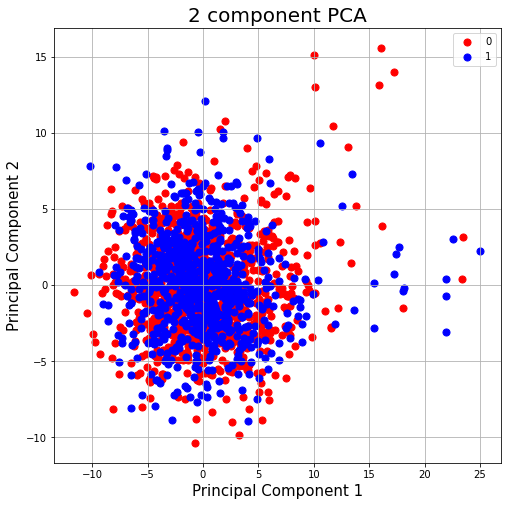

In [207]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['overall_survival'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 4'], finalDf.loc[indicesToKeep, 'principal component 6'], c = color, s = 50)
ax.legend(targets)
ax.grid()

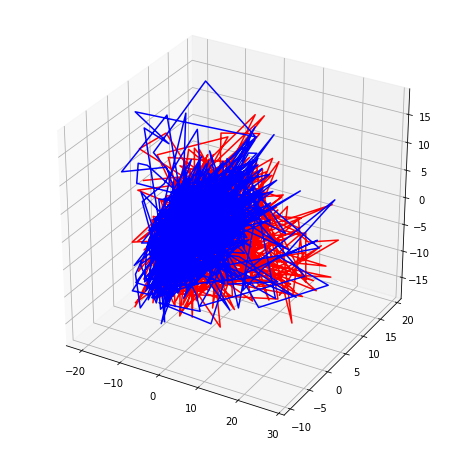

In [208]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection ='3d')

targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['overall_survival'] == target
    ax.plot3D(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2'], finalDf.loc[indicesToKeep, 'principal component 3'], c = color)
plt.show()

# tSNE

In [209]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
tsne_reduction = tsne.fit_transform(x_gene_expression)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1904 samples in 0.002s...
[t-SNE] Computed neighbors for 1904 samples in 0.256s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1904
[t-SNE] Computed conditional probabilities for sample 1904 / 1904
[t-SNE] Mean sigma: 5.415021
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.795006
[t-SNE] KL divergence after 1000 iterations: 2.150530


In [210]:
principalDf = pd.DataFrame(data=tsne_reduction, columns=[f'principal component {i}' for i in range(1, 3)])
principalDf

,principal component 1,principal component 2
0,-24.941784,-13.699507
1,-18.476665,16.680561
2,-28.881937,14.115962
3,-28.687260,14.107454
4,-5.714952,-12.184855
...,...,...
1899,-15.529817,0.250890
1900,-14.204007,17.510719
1901,-8.061062,18.331085
1902,-16.965878,12.494500


In [211]:
finalDf = pd.concat([principalDf, y_gene_expression], axis=1)
finalDf

,principal component 1,principal component 2,overall_survival
0,-24.941784,-13.699507,1
1,-18.476665,16.680561,1
2,-28.881937,14.115962,0
3,-28.687260,14.107454,1
4,-5.714952,-12.184855,0
...,...,...,...
1899,-15.529817,0.250890,1
1900,-14.204007,17.510719,0
1901,-8.061062,18.331085,0
1902,-16.965878,12.494500,0


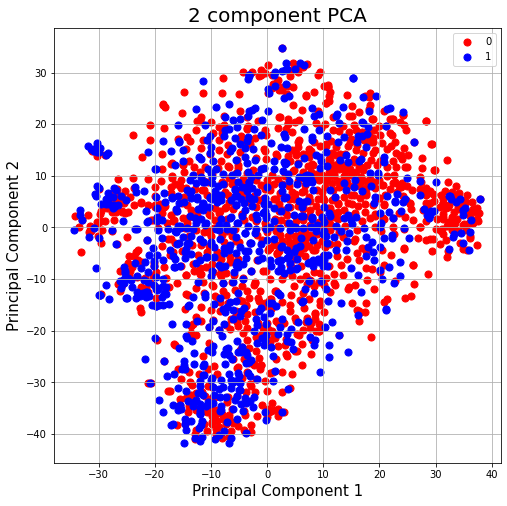

In [212]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['overall_survival'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

# MDS

In [359]:
embedding = MDS(n_components=2)
mds_reduction = embedding.fit_transform(x_gene_expression)

In [360]:
principalDf = pd.DataFrame(data=mds_reduction, columns=[f'principal component {i}' for i in range(1, 3)])
finalDf = pd.concat([principalDf, y_gene_expression], axis=1)
finalDf

,principal component 1,principal component 2,overall_survival
0,-32.453931,-2.002856,1
1,-16.715331,16.538690,1
2,-28.403861,-7.014402,0
3,-32.850717,-5.116108,1
4,-20.361205,-16.562515,0
...,...,...,...
1899,-12.090333,-4.173214,1
1900,-9.959071,-16.408704,0
1901,-19.969129,-9.514868,0
1902,-19.675219,9.461899,0


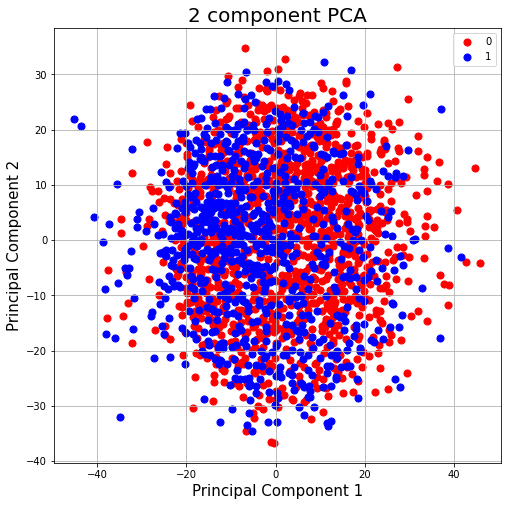

In [361]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['overall_survival'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

In [216]:
x_clinical_section = clinical_section_total.iloc[:, 1:24]
x_clinical_section = pd.concat([x_clinical_section, clinical_section_total.iloc[:, 25:]], axis=1)
y_clinical_section = clinical_section_total.iloc[:, 24]

In [217]:
x_gene_expression_not_reduced = gene_expression_total.iloc[:, :-1]
y_gene_expression_not_reduced = gene_expression_total.iloc[:, -1]

pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x_gene_expression)
principalDf = pd.DataFrame(data=principalComponents, columns=[f'principal component {i}' for i in range(1, 11)])
finalDf = pd.concat([principalDf, y_gene_expression], axis=1)

x_gene_expression_reduced = finalDf.iloc[:, :-1]
y_gene_expression_reduced = finalDf.iloc[:, -1]

In [218]:
x_both = pd.concat([x_clinical_section, x_gene_expression_reduced], axis=1)
y_both = y_gene_expression

In [219]:
print(x_clinical_section.shape)
print(x_gene_expression_not_reduced.shape)
print(x_gene_expression_reduced.shape)
print(x_both.shape)

(1904, 28)
(1904, 489)
(1904, 10)
(1904, 38)


In [220]:
results = dict()

# Classic Model (25 Points)

In this section, you must implement a classic classification model for clinical, gene expressions, and reduced gene expressions datasets. Using Random Forest is suggested. (minimum acceptable accuracy = 60%)

# Clinical section

In [221]:
results["Clinical Section"] = dict()

In [222]:
x_train_clinical_section, x_test_clinical_section, y_train_clinical_section, y_test_clinical_section = train_test_split(x_clinical_section, y_clinical_section, test_size=0.2, random_state=0)

In [223]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train_clinical_section)
x_test = sc.transform(x_test_clinical_section)

<font color="red">KNN</font>

In [224]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train, y_train_clinical_section)

KNeighborsClassifier()

In [225]:
y_pred = classifier.predict(x_test)

In [226]:
cm = confusion_matrix(y_test_clinical_section, y_pred)
cm

array([[174,  51],
       [ 63,  93]])

In [227]:
acc = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
results["Clinical Section"]["KNN"] = acc
print("accuracy:", acc)

accuracy: 0.7007874015748031


<font color="red">SVM</font>

In [228]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train_clinical_section)

SVC(kernel='linear', random_state=0)

In [229]:
y_pred = classifier.predict(x_test)

In [230]:
cm = confusion_matrix(y_test_clinical_section, y_pred)
cm

array([[179,  46],
       [ 52, 104]])

In [231]:
acc = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
print("accuracy:", acc)
results["Clinical Section"]["SVM-Linear"] = acc

accuracy: 0.7427821522309711


In [232]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train_clinical_section)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test_clinical_section, y_pred)
acc = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
print("accuracy:", acc)
results["Clinical Section"]["SVM-RBF"] = acc

accuracy: 0.7401574803149606


<font color="red">Decision Tree</font>

In [233]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train_clinical_section)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test_clinical_section, y_pred)
acc = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
print("accuracy:", acc)
results["Clinical Section"]["Decision Tree"] = acc

accuracy: 0.6902887139107612


<font color="red">Random Forest</font>

In [234]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train_clinical_section)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test_clinical_section, y_pred)
acc = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
print("accuracy:", acc)
results["Clinical Section"]["Random Forest"] = acc

accuracy: 0.7270341207349081


<font color="red">Linear Regression</font>

In [235]:
classifier = LinearRegression()
classifier.fit(x_train, y_train_clinical_section)
y_pred = classifier.predict(x_test)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
cm = confusion_matrix(y_test_clinical_section, y_pred)
acc = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
print("accuracy:", acc)
results["Clinical Section"]["Linear Regression"] = acc

accuracy: 0.7375328083989501


<font color="red">Decision Tree Regressor</font>

In [236]:
classifier = DecisionTreeRegressor(random_state=0)
classifier.fit(x_train, y_train_clinical_section)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test_clinical_section, y_pred)
acc = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
print("accuracy:", acc)
results["Clinical Section"]["Decision Tree Regressor"] = acc

accuracy: 0.6797900262467191


<font color="red">Random Forest Regressor</font>

In [237]:
classifier = RandomForestRegressor(n_estimators = 10, random_state = 0)
classifier.fit(x_train, y_train_clinical_section)
y_pred = classifier.predict(x_test)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
cm = confusion_matrix(y_test_clinical_section, y_pred)
acc = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
print("accuracy:", acc)
results["Clinical Section"]["Random Forest Regressor"] = acc

accuracy: 0.7139107611548556


<font color="red">Logistic Regression</font>

In [238]:
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train_clinical_section)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test_clinical_section, y_pred)
acc = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
print("accuracy:", acc)
results["Clinical Section"]["Logistic Regression"] = acc

accuracy: 0.7375328083989501


# Reduced Gene Expression Section

In [239]:
results["Reduced Gene Expression"] = dict()

In [240]:
x_train_reduced_gene_expression, x_test_reduced_gene_expression, y_train_reduced_gene_expression, y_test_reduced_gene_expression = train_test_split(x_gene_expression_reduced, y_gene_expression_reduced, test_size=0.2, random_state=0)

In [241]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train_reduced_gene_expression)
x_test = sc.transform(x_test_reduced_gene_expression)

<font color="red">KNN</font>

In [242]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train, y_train_reduced_gene_expression)

KNeighborsClassifier()

In [243]:
y_pred = classifier.predict(x_test)

In [244]:
cm = confusion_matrix(y_test_reduced_gene_expression, y_pred)
cm

array([[150,  75],
       [ 92,  64]])

In [245]:
acc = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
print("accuracy:", acc)
results["Reduced Gene Expression"]["KNN"] = acc

accuracy: 0.5616797900262467


<font color="red">SVM</font>

In [246]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train_reduced_gene_expression)

SVC(kernel='linear', random_state=0)

In [247]:
y_pred = classifier.predict(x_test)

In [248]:
cm = confusion_matrix(y_test_reduced_gene_expression, y_pred)
cm

array([[197,  28],
       [119,  37]])

In [249]:
acc = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
print("accuracy:", acc)
results["Reduced Gene Expression"]["SVM-Linear"] = acc

accuracy: 0.6141732283464567


In [250]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train_reduced_gene_expression)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test_reduced_gene_expression, y_pred)
acc = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
print("accuracy:", acc)
results["Reduced Gene Expression"]["SVM-RBF"] = acc

accuracy: 0.6456692913385826


<font color="red">Decision Tree</font>

In [251]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train_reduced_gene_expression)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test_reduced_gene_expression, y_pred)
acc = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
print("accuracy:", acc)
results["Reduced Gene Expression"]["Decision Tree"] = acc

accuracy: 0.5695538057742782


<font color="red">Random Forest</font>

In [252]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train_reduced_gene_expression)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test_reduced_gene_expression, y_pred)
acc = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
print("accuracy:", acc)
results["Reduced Gene Expression"]["Random Forest"] = acc

accuracy: 0.5853018372703412


<font color="red">Linear Regression</font>

In [253]:
classifier = LinearRegression()
classifier.fit(x_train, y_train_reduced_gene_expression)
y_pred = classifier.predict(x_test)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
cm = confusion_matrix(y_test_reduced_gene_expression, y_pred)
acc = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
print("accuracy:", acc)
results["Reduced Gene Expression"]["Linear Regression"] = acc

accuracy: 0.6246719160104987


<font color="red">Decision Tree Regressor</font>

In [254]:
classifier = DecisionTreeRegressor(random_state=0)
classifier.fit(x_train, y_train_reduced_gene_expression)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test_reduced_gene_expression, y_pred)
acc = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
print("accuracy:", acc)
results["Reduced Gene Expression"]["Decision Tree Regressor"] = acc

accuracy: 0.5643044619422573


<font color="red">Random Forest Regressor</font>

In [255]:
classifier = RandomForestRegressor(n_estimators = 10, random_state = 0)
classifier.fit(x_train, y_train_reduced_gene_expression)
y_pred = classifier.predict(x_test)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
cm = confusion_matrix(y_test_reduced_gene_expression, y_pred)
acc = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
print("accuracy:", acc)
results["Reduced Gene Expression"]["Random Forest Regressor"] = acc

accuracy: 0.6089238845144357


<font color="red">Logistic Regression</font>

In [256]:
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train_reduced_gene_expression)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test_reduced_gene_expression, y_pred)
acc = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
print("accuracy:", acc)
results["Reduced Gene Expression"]["Logistic Regression"] = acc

accuracy: 0.6141732283464567


# Not Reduced Gene Expression Section

In [257]:
results["Not Reduced Gene Expression"] = dict()

In [258]:
x_train_not_reduced_gene_expression, x_test_not_reduced_gene_expression, y_train_not_reduced_gene_expression, y_test_not_reduced_gene_expression = train_test_split(x_gene_expression_not_reduced, y_gene_expression_not_reduced, test_size=0.2, random_state=0)

In [259]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train_not_reduced_gene_expression)
x_test = sc.transform(x_test_not_reduced_gene_expression)

<font color="red">KNN</font>

In [260]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train, y_train_not_reduced_gene_expression)

KNeighborsClassifier()

In [261]:
y_pred = classifier.predict(x_test)

In [262]:
cm = confusion_matrix(y_test_not_reduced_gene_expression, y_pred)
cm

array([[141,  84],
       [ 62,  94]])

In [263]:
acc = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
print("accuracy:", acc)
results["Not Reduced Gene Expression"]["KNN"] = acc

accuracy: 0.6167979002624672


<font color="red">SVM</font>

In [264]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train_not_reduced_gene_expression)

SVC(kernel='linear', random_state=0)

In [265]:
y_pred = classifier.predict(x_test)

In [266]:
cm = confusion_matrix(y_test_not_reduced_gene_expression, y_pred)
cm

array([[153,  72],
       [ 78,  78]])

In [267]:
acc = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
print("accuracy:", acc)
results["Not Reduced Gene Expression"]["SVM-Linear"] = acc

accuracy: 0.6062992125984252


In [268]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train_not_reduced_gene_expression)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test_not_reduced_gene_expression, y_pred)
acc = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
print("accuracy:", acc)
results["Not Reduced Gene Expression"]["SVM-RBF"] = acc

accuracy: 0.6614173228346457


<font color="red">Decision Tree</font>

In [269]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train_not_reduced_gene_expression)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test_not_reduced_gene_expression, y_pred)
acc = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
print("accuracy:", acc)
results["Not Reduced Gene Expression"]["Decision Tree"] = acc

accuracy: 0.5538057742782152


<font color="red">Random Forest</font>

In [270]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train_not_reduced_gene_expression)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test_not_reduced_gene_expression, y_pred)
acc = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
print("accuracy:", acc)
results["Not Reduced Gene Expression"]["Random Forest"] = acc

accuracy: 0.6115485564304461


<font color="red">Linear Regression</font>

In [271]:
classifier = LinearRegression()
classifier.fit(x_train, y_train_not_reduced_gene_expression)
y_pred = classifier.predict(x_test)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
cm = confusion_matrix(y_test_not_reduced_gene_expression, y_pred)
acc = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
print("accuracy:", acc)
results["Not Reduced Gene Expression"]["Linear Regression"] = acc

accuracy: 0.6246719160104987


<font color="red">Decision Tree Regressor</font>

In [272]:
classifier = DecisionTreeRegressor(random_state=0)
classifier.fit(x_train, y_train_not_reduced_gene_expression)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test_not_reduced_gene_expression, y_pred)
acc = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
print("accuracy:", acc)
results["Not Reduced Gene Expression"]["Decision Tree Regressor"] = acc

accuracy: 0.5826771653543307


<font color="red">Random Forest Regressor</font>

In [273]:
classifier = RandomForestRegressor(n_estimators = 10, random_state = 0)
classifier.fit(x_train, y_train_not_reduced_gene_expression)
y_pred = classifier.predict(x_test)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
cm = confusion_matrix(y_test_not_reduced_gene_expression, y_pred)
acc = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
print("accuracy:", acc)
results["Not Reduced Gene Expression"]["Random Forest Regressor"] = acc

accuracy: 0.6351706036745407


<font color="red">Logistic Regression</font>

In [274]:
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train_not_reduced_gene_expression)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test_not_reduced_gene_expression, y_pred)
acc = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
print("accuracy:", acc)
results["Not Reduced Gene Expression"]["Logistic Regression"] = acc

accuracy: 0.6141732283464567


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Concatinated Section

In [275]:
results["Both Clinical and Gene Reduced Expresssion"] = dict()

In [276]:
x_train_concat, x_test_concat, y_train_concat, y_test_concat = train_test_split(x_both, y_both, test_size=0.2, random_state=0)

In [277]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train_concat)
x_test = sc.transform(x_test_concat)

<font color="red">KNN</font>

In [278]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train, y_train_concat)

KNeighborsClassifier()

In [279]:
y_pred = classifier.predict(x_test)

In [280]:
cm = confusion_matrix(y_test_concat, y_pred)
cm

array([[169,  56],
       [ 66,  90]])

In [281]:
acc = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
print("accuracy:", acc)
results["Both Clinical and Gene Reduced Expresssion"]["KNN"] = acc

accuracy: 0.6797900262467191


<font color="red">SVM</font>

In [282]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train_concat)

SVC(kernel='linear', random_state=0)

In [283]:
y_pred = classifier.predict(x_test)

In [284]:
cm = confusion_matrix(y_test_concat, y_pred)
cm

array([[180,  45],
       [ 49, 107]])

In [285]:
acc = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
print("accuracy:", acc)
results["Both Clinical and Gene Reduced Expresssion"]["SVM-Linear"] = acc

accuracy: 0.7532808398950132


In [286]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train_concat)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test_concat, y_pred)
acc = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
print("accuracy:", acc)
results["Both Clinical and Gene Reduced Expresssion"]["SVM-RBF"] = acc

accuracy: 0.7454068241469817


<font color="red">Decision Tree</font>

In [287]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train_concat)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test_concat, y_pred)
acc = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
print("accuracy:", acc)
results["Both Clinical and Gene Reduced Expresssion"]["Decision Tree"] = acc

accuracy: 0.6797900262467191


<font color="red">Random Forest</font>

In [288]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train_concat)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test_concat, y_pred)
acc = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
print("accuracy:", acc)
results["Both Clinical and Gene Reduced Expresssion"]["Random Forest"] = acc

accuracy: 0.7979002624671916


<font color="red">Linear Regression</font>

In [289]:
classifier = LinearRegression()
classifier.fit(x_train, y_train_concat)
y_pred = classifier.predict(x_test)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
cm = confusion_matrix(y_test_concat, y_pred)
acc = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
print("accuracy:", acc)
results["Both Clinical and Gene Reduced Expresssion"]["Linear Regression"] = acc

accuracy: 0.7401574803149606


<font color="red">Decision Tree Regressor</font>

In [290]:
classifier = DecisionTreeRegressor(random_state=0)
classifier.fit(x_train, y_train_concat)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test_concat, y_pred)
acc = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
print("accuracy:", acc)
results["Both Clinical and Gene Reduced Expresssion"]["Decision Tree Regressor"] = acc

accuracy: 0.6535433070866141


<font color="red">Random Forest Regressor</font>

In [291]:
classifier = RandomForestRegressor(n_estimators = 10, random_state = 0)
classifier.fit(x_train, y_train_concat)
y_pred = classifier.predict(x_test)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
cm = confusion_matrix(y_test_concat, y_pred)
acc = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
print("accuracy:", acc)
results["Both Clinical and Gene Reduced Expresssion"]["Random Forest Regressor"] = acc

accuracy: 0.7427821522309711


<font color="red">Logistic Regression</font>

In [292]:
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train_concat)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test_concat, y_pred)
acc = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
print("accuracy:", acc)
results["Both Clinical and Gene Reduced Expresssion"]["Logistic Regression"] = acc

accuracy: 0.7401574803149606


# Neural Network (30 Points)

In this section, you must implement a neural network model for clinical, gene expressions and reduced gene expressions datasets. Using the MPL models is suggested. (minimum acceptable accuracy = 60%)

In [293]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [294]:
# define dataset 
class genDataset(Dataset):
  def __init__(self, x, y):
    self.x = x
    self.y = y
    self.len = self.x.shape[0]
  def __getitem__(self, index):
    return self.x[index], self.y[index]
  def __len__(self):
    return self.len

In [309]:
# define model
class Model(nn.Module):
  def __init__(self, input_dim, num_classes, model_type):
    self.model_type = model_type
    super(Model, self).__init__()

    self.type1_layers = nn.Sequential(
        nn.Linear(input_dim, 32),
        nn.LeakyReLU(),
        nn.Linear(32, 16),
        nn.LeakyReLU(),
        nn.Linear(16, 8),
        nn.LeakyReLU(),
        nn.Linear(8,num_classes),
        nn.LeakyReLU(),
        nn.Sigmoid(),
        nn.Softmax(dim=1)
    )
    self.type2_layers = nn.Sequential(
        nn.Linear(input_dim,4),
        nn.ReLU(),
        nn.Linear(4,num_classes),
        nn.ReLU(),
        nn.Sigmoid(),
        nn.Softmax(dim=1)
    )

    self.type3_layers = nn.Sequential(
        nn.Linear(input_dim, 16),
        nn.LeakyReLU(),
        nn.Linear(16, 8),
        nn.LeakyReLU(),
        nn.Linear(8,num_classes),
        nn.LeakyReLU(),
        nn.Sigmoid(),
        nn.Softmax(dim=1)
    )
    self.type4_layers = nn.Sequential(
        nn.Linear(input_dim, 256),
        nn.LeakyReLU(),
        nn.Linear(256, 128),
        nn.LeakyReLU(),
        nn.Linear(128, 64),
        nn.LeakyReLU(),
        nn.Linear(64, 32),
        nn.LeakyReLU(),
        nn.Linear(32, num_classes),
        nn.LeakyReLU(),
        nn.Sigmoid(),
        nn.Softmax(dim=1)
    )

  def forward(self, x):
    out = None 
    if(self.model_type == "both"):
      out = self.type1_layers(x)
    elif(self.model_type == "gene_only_reduced"):
      out = self.type2_layers(x)
    elif(self.model_type == "clinical_only"):
      out = self.type3_layers(x)
    elif(self.model_type == "gene_only_not_reduced"):
      out = self.type4_layers(x)

    return out
  


In [296]:
def train_model(model,criterion,optimizer,n_epochs,train_loader,val_loader):
    train_losses = []
    train_accs = []
    val_losses = []
    val_accs = []

    for epoch in range(n_epochs):
        train_loss = 0.0
        acc = 0.0
        n = 0
        model.train()
        with tqdm(train_loader, unit='batch') as torch_epoch:
            for x, y in torch_epoch:
                x = x.to(device).type(torch.float32)
                y = y.to(device)
                # going forward and calculate loss
                out = model(x)
                loss = criterion(out, y)
                train_loss += loss.item()
                n += 1
                # going backward and update parameters
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                # calculate accuracy  
                predicted = torch.argmax(out, dim=1)
                acc += (predicted == y).sum().item() / len(y)
                torch_epoch.set_description(f'Train {epoch} | Loss:{train_loss/n:.2e} | Acc: {acc/n:.2f}|')
        
        train_losses.append(train_loss/n)
        train_accs.append(acc/n)

        # validate model
        val_loss = 0.0
        acc = 0.0
        n = 0
        model.eval()
        with tqdm(val_loader, unit='batch') as torch_epoch:
            for x, y in torch_epoch:
                x = x.to(device).type(torch.float32)
                y = y.to(device)
                # going forward and calculate loss
                out = model(x)
                loss = criterion(out, y)
                val_loss += loss.item()
                n += 1
                # calculate accuracy  
                predicted = torch.argmax(out, dim=1)
                acc += (predicted == y).sum().item() / len(y)
                torch_epoch.set_description(f'Val {epoch} | Loss:{val_loss/n:.2e} | Acc: {acc/n:.2f}|')
        
        val_losses.append(val_loss/n)
        val_accs.append(acc/n)
        print(f'----------------------------[Epoch{epoch} finished!]----------------------------')
    return train_losses,val_losses,train_accs,val_accs

In [297]:
def plot_loss_acc(train_losses,val_losses,train_accs,val_accs):
  # plot loss in each epoch
  plt.plot(train_losses, label='train loss')
  plt.plot(val_losses, label='val loss')
  plt.legend()
  plt.show()

  # plot accuracy in each epoch
  plt.plot(train_accs, label='train acc')
  plt.plot(val_accs, label='val acc')
  plt.legend()
  plt.show()


In [298]:
def test_model(model,criterion,test_loader):
  test_loss = 0.0
  acc = 0.0
  n = 0
  model.eval()
  with tqdm(test_loader,unit='batch') as torch_epoch:
      for x, y in torch_epoch:
          x = x.to(device).type(torch.float32)
          y = y.to(device)
          # going forward and calculate loss
          out = model(x)
          loss = criterion(out, y)
          test_loss += loss.item()
          n += 1
          # calculate accuracy  
          predicted = torch.argmax(out, dim=1)
          acc += (predicted == y).sum().item() / len(y)
          torch_epoch.set_description(f'Test | Loss:{test_loss/n:.2e} | Acc: {acc/n:.2f}|')
  return y,predicted,acc

In [299]:
def conf_matrix(y,predicted):
  confusion = confusion_matrix(y.cpu(), predicted.cpu())
  plt.figure(figsize=(10,10))
  plt.title('Confusion Matrix')
  sn.heatmap(confusion, annot=True, fmt='d', cmap="Wistia")
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()

#### on both clinical_section and gene_expression ####

In [301]:
# define dataset
dataset = genDataset(x_both.values, y_both.values)

# split dataset into train validation and test
train_size = int(0.85 * len(dataset))
val_size = int(0.05 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# define dataloader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size= test_dataset.__len__(), shuffle=True)

# define model
input_size = 38
both_model = Model(input_size, 2 , "both").to(device)

# define hyper parameters
n_epochs = 50
lr = 0.001

# define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(both_model.parameters(), lr=lr , weight_decay=0.0001)

# train 
train_losses,val_losses,train_accs,val_accs = train_model(both_model,criterion,
                                                          optimizer,n_epochs,train_loader,val_loader)

Train 0 | Loss:6.79e-01 | Acc: 0.58|: 100%|██████████| 51/51 [00:00<00:00, 169.64batch/s]
Val 0 | Loss:6.63e-01 | Acc: 0.61|: 100%|██████████| 3/3 [00:00<00:00, 183.16batch/s]


----------------------------[Epoch0 finished!]----------------------------


Train 1 | Loss:6.64e-01 | Acc: 0.60|: 100%|██████████| 51/51 [00:00<00:00, 155.47batch/s]
Val 1 | Loss:6.58e-01 | Acc: 0.68|: 100%|██████████| 3/3 [00:00<00:00, 232.52batch/s]


----------------------------[Epoch1 finished!]----------------------------


Train 2 | Loss:6.59e-01 | Acc: 0.69|: 100%|██████████| 51/51 [00:00<00:00, 152.69batch/s]
Val 2 | Loss:6.46e-01 | Acc: 0.69|: 100%|██████████| 3/3 [00:00<00:00, 269.25batch/s]


----------------------------[Epoch2 finished!]----------------------------


Train 3 | Loss:6.47e-01 | Acc: 0.72|: 100%|██████████| 51/51 [00:00<00:00, 156.43batch/s]
Val 3 | Loss:6.43e-01 | Acc: 0.74|: 100%|██████████| 3/3 [00:00<00:00, 214.67batch/s]


----------------------------[Epoch3 finished!]----------------------------


Train 4 | Loss:6.45e-01 | Acc: 0.72|: 100%|██████████| 51/51 [00:00<00:00, 143.96batch/s]
Val 4 | Loss:6.40e-01 | Acc: 0.75|: 100%|██████████| 3/3 [00:00<00:00, 259.32batch/s]


----------------------------[Epoch4 finished!]----------------------------


Train 5 | Loss:6.47e-01 | Acc: 0.71|: 100%|██████████| 51/51 [00:00<00:00, 151.81batch/s]
Val 5 | Loss:6.40e-01 | Acc: 0.73|: 100%|██████████| 3/3 [00:00<00:00, 260.33batch/s]


----------------------------[Epoch5 finished!]----------------------------


Train 6 | Loss:6.44e-01 | Acc: 0.73|: 100%|██████████| 51/51 [00:00<00:00, 146.69batch/s]
Val 6 | Loss:6.38e-01 | Acc: 0.74|: 100%|██████████| 3/3 [00:00<00:00, 205.77batch/s]


----------------------------[Epoch6 finished!]----------------------------


Train 7 | Loss:6.43e-01 | Acc: 0.73|: 100%|██████████| 51/51 [00:00<00:00, 152.72batch/s]
Val 7 | Loss:6.37e-01 | Acc: 0.76|: 100%|██████████| 3/3 [00:00<00:00, 188.91batch/s]


----------------------------[Epoch7 finished!]----------------------------


Train 8 | Loss:6.41e-01 | Acc: 0.73|: 100%|██████████| 51/51 [00:00<00:00, 145.58batch/s]
Val 8 | Loss:6.46e-01 | Acc: 0.70|: 100%|██████████| 3/3 [00:00<00:00, 237.43batch/s]


----------------------------[Epoch8 finished!]----------------------------


Train 9 | Loss:6.45e-01 | Acc: 0.72|: 100%|██████████| 51/51 [00:00<00:00, 152.36batch/s]
Val 9 | Loss:6.39e-01 | Acc: 0.74|: 100%|██████████| 3/3 [00:00<00:00, 225.50batch/s]


----------------------------[Epoch9 finished!]----------------------------


Train 10 | Loss:6.41e-01 | Acc: 0.73|: 100%|██████████| 51/51 [00:00<00:00, 132.02batch/s]
Val 10 | Loss:6.36e-01 | Acc: 0.73|: 100%|██████████| 3/3 [00:00<00:00, 173.24batch/s]


----------------------------[Epoch10 finished!]----------------------------


Train 11 | Loss:6.41e-01 | Acc: 0.72|: 100%|██████████| 51/51 [00:00<00:00, 135.66batch/s]
Val 11 | Loss:6.34e-01 | Acc: 0.76|: 100%|██████████| 3/3 [00:00<00:00, 190.79batch/s]


----------------------------[Epoch11 finished!]----------------------------


Train 12 | Loss:6.38e-01 | Acc: 0.74|: 100%|██████████| 51/51 [00:00<00:00, 138.14batch/s]
Val 12 | Loss:6.36e-01 | Acc: 0.70|: 100%|██████████| 3/3 [00:00<00:00, 190.52batch/s]


----------------------------[Epoch12 finished!]----------------------------


Train 13 | Loss:6.38e-01 | Acc: 0.73|: 100%|██████████| 51/51 [00:00<00:00, 134.26batch/s]
Val 13 | Loss:6.33e-01 | Acc: 0.76|: 100%|██████████| 3/3 [00:00<00:00, 148.05batch/s]


----------------------------[Epoch13 finished!]----------------------------


Train 14 | Loss:6.36e-01 | Acc: 0.74|: 100%|██████████| 51/51 [00:00<00:00, 135.92batch/s]
Val 14 | Loss:6.32e-01 | Acc: 0.73|: 100%|██████████| 3/3 [00:00<00:00, 209.35batch/s]


----------------------------[Epoch14 finished!]----------------------------


Train 15 | Loss:6.35e-01 | Acc: 0.73|: 100%|██████████| 51/51 [00:00<00:00, 125.59batch/s]
Val 15 | Loss:6.27e-01 | Acc: 0.75|: 100%|██████████| 3/3 [00:00<00:00, 142.57batch/s]


----------------------------[Epoch15 finished!]----------------------------


Train 16 | Loss:6.35e-01 | Acc: 0.73|: 100%|██████████| 51/51 [00:00<00:00, 121.89batch/s]
Val 16 | Loss:6.29e-01 | Acc: 0.72|: 100%|██████████| 3/3 [00:00<00:00, 188.49batch/s]


----------------------------[Epoch16 finished!]----------------------------


Train 17 | Loss:6.31e-01 | Acc: 0.72|: 100%|██████████| 51/51 [00:00<00:00, 125.77batch/s]
Val 17 | Loss:6.23e-01 | Acc: 0.72|: 100%|██████████| 3/3 [00:00<00:00, 217.79batch/s]


----------------------------[Epoch17 finished!]----------------------------


Train 18 | Loss:6.28e-01 | Acc: 0.72|: 100%|██████████| 51/51 [00:00<00:00, 164.19batch/s]
Val 18 | Loss:6.18e-01 | Acc: 0.73|: 100%|██████████| 3/3 [00:00<00:00, 349.47batch/s]


----------------------------[Epoch18 finished!]----------------------------


Train 19 | Loss:6.26e-01 | Acc: 0.72|: 100%|██████████| 51/51 [00:00<00:00, 156.31batch/s]
Val 19 | Loss:6.20e-01 | Acc: 0.72|: 100%|██████████| 3/3 [00:00<00:00, 259.85batch/s]


----------------------------[Epoch19 finished!]----------------------------


Train 20 | Loss:6.22e-01 | Acc: 0.73|: 100%|██████████| 51/51 [00:00<00:00, 158.41batch/s]
Val 20 | Loss:6.18e-01 | Acc: 0.73|: 100%|██████████| 3/3 [00:00<00:00, 272.99batch/s]


----------------------------[Epoch20 finished!]----------------------------


Train 21 | Loss:6.27e-01 | Acc: 0.69|: 100%|██████████| 51/51 [00:00<00:00, 155.81batch/s]
Val 21 | Loss:6.18e-01 | Acc: 0.72|: 100%|██████████| 3/3 [00:00<00:00, 274.80batch/s]


----------------------------[Epoch21 finished!]----------------------------


Train 22 | Loss:6.21e-01 | Acc: 0.73|: 100%|██████████| 51/51 [00:00<00:00, 170.18batch/s]
Val 22 | Loss:6.17e-01 | Acc: 0.72|: 100%|██████████| 3/3 [00:00<00:00, 205.82batch/s]


----------------------------[Epoch22 finished!]----------------------------


Train 23 | Loss:6.24e-01 | Acc: 0.71|: 100%|██████████| 51/51 [00:00<00:00, 144.17batch/s]
Val 23 | Loss:6.15e-01 | Acc: 0.74|: 100%|██████████| 3/3 [00:00<00:00, 269.54batch/s]


----------------------------[Epoch23 finished!]----------------------------


Train 24 | Loss:6.19e-01 | Acc: 0.74|: 100%|██████████| 51/51 [00:00<00:00, 157.89batch/s]
Val 24 | Loss:6.12e-01 | Acc: 0.76|: 100%|██████████| 3/3 [00:00<00:00, 267.07batch/s]


----------------------------[Epoch24 finished!]----------------------------


Train 25 | Loss:6.17e-01 | Acc: 0.74|: 100%|██████████| 51/51 [00:00<00:00, 150.41batch/s]
Val 25 | Loss:6.12e-01 | Acc: 0.76|: 100%|██████████| 3/3 [00:00<00:00, 246.48batch/s]


----------------------------[Epoch25 finished!]----------------------------


Train 26 | Loss:6.18e-01 | Acc: 0.74|: 100%|██████████| 51/51 [00:00<00:00, 148.39batch/s]
Val 26 | Loss:6.07e-01 | Acc: 0.76|: 100%|██████████| 3/3 [00:00<00:00, 213.95batch/s]


----------------------------[Epoch26 finished!]----------------------------


Train 27 | Loss:6.18e-01 | Acc: 0.73|: 100%|██████████| 51/51 [00:00<00:00, 150.79batch/s]
Val 27 | Loss:6.07e-01 | Acc: 0.76|: 100%|██████████| 3/3 [00:00<00:00, 251.54batch/s]


----------------------------[Epoch27 finished!]----------------------------


Train 28 | Loss:6.16e-01 | Acc: 0.74|: 100%|██████████| 51/51 [00:00<00:00, 150.48batch/s]
Val 28 | Loss:6.10e-01 | Acc: 0.74|: 100%|██████████| 3/3 [00:00<00:00, 242.29batch/s]


----------------------------[Epoch28 finished!]----------------------------


Train 29 | Loss:6.21e-01 | Acc: 0.73|: 100%|██████████| 51/51 [00:00<00:00, 159.48batch/s]
Val 29 | Loss:6.12e-01 | Acc: 0.73|: 100%|██████████| 3/3 [00:00<00:00, 232.75batch/s]


----------------------------[Epoch29 finished!]----------------------------


Train 30 | Loss:6.18e-01 | Acc: 0.73|: 100%|██████████| 51/51 [00:00<00:00, 159.78batch/s]
Val 30 | Loss:6.13e-01 | Acc: 0.72|: 100%|██████████| 3/3 [00:00<00:00, 218.01batch/s]


----------------------------[Epoch30 finished!]----------------------------


Train 31 | Loss:6.16e-01 | Acc: 0.74|: 100%|██████████| 51/51 [00:00<00:00, 159.44batch/s]
Val 31 | Loss:6.11e-01 | Acc: 0.75|: 100%|██████████| 3/3 [00:00<00:00, 262.46batch/s]


----------------------------[Epoch31 finished!]----------------------------


Train 32 | Loss:6.15e-01 | Acc: 0.74|: 100%|██████████| 51/51 [00:00<00:00, 146.97batch/s]
Val 32 | Loss:6.05e-01 | Acc: 0.76|: 100%|██████████| 3/3 [00:00<00:00, 297.40batch/s]


----------------------------[Epoch32 finished!]----------------------------


Train 33 | Loss:6.16e-01 | Acc: 0.74|: 100%|██████████| 51/51 [00:00<00:00, 166.32batch/s]
Val 33 | Loss:6.06e-01 | Acc: 0.76|: 100%|██████████| 3/3 [00:00<00:00, 206.59batch/s]


----------------------------[Epoch33 finished!]----------------------------


Train 34 | Loss:6.17e-01 | Acc: 0.74|: 100%|██████████| 51/51 [00:00<00:00, 140.28batch/s]
Val 34 | Loss:6.10e-01 | Acc: 0.75|: 100%|██████████| 3/3 [00:00<00:00, 164.74batch/s]


----------------------------[Epoch34 finished!]----------------------------


Train 35 | Loss:6.13e-01 | Acc: 0.75|: 100%|██████████| 51/51 [00:00<00:00, 153.21batch/s]
Val 35 | Loss:6.07e-01 | Acc: 0.76|: 100%|██████████| 3/3 [00:00<00:00, 304.18batch/s]


----------------------------[Epoch35 finished!]----------------------------


Train 36 | Loss:6.16e-01 | Acc: 0.73|: 100%|██████████| 51/51 [00:00<00:00, 149.39batch/s]
Val 36 | Loss:6.09e-01 | Acc: 0.73|: 100%|██████████| 3/3 [00:00<00:00, 198.33batch/s]


----------------------------[Epoch36 finished!]----------------------------


Train 37 | Loss:6.15e-01 | Acc: 0.74|: 100%|██████████| 51/51 [00:00<00:00, 143.09batch/s]
Val 37 | Loss:6.08e-01 | Acc: 0.75|: 100%|██████████| 3/3 [00:00<00:00, 227.22batch/s]


----------------------------[Epoch37 finished!]----------------------------


Train 38 | Loss:6.13e-01 | Acc: 0.73|: 100%|██████████| 51/51 [00:00<00:00, 143.84batch/s]
Val 38 | Loss:6.05e-01 | Acc: 0.76|: 100%|██████████| 3/3 [00:00<00:00, 272.78batch/s]


----------------------------[Epoch38 finished!]----------------------------


Train 39 | Loss:6.11e-01 | Acc: 0.73|: 100%|██████████| 51/51 [00:00<00:00, 155.96batch/s]
Val 39 | Loss:6.02e-01 | Acc: 0.76|: 100%|██████████| 3/3 [00:00<00:00, 184.66batch/s]


----------------------------[Epoch39 finished!]----------------------------


Train 40 | Loss:6.13e-01 | Acc: 0.74|: 100%|██████████| 51/51 [00:00<00:00, 151.48batch/s]
Val 40 | Loss:6.08e-01 | Acc: 0.74|: 100%|██████████| 3/3 [00:00<00:00, 138.52batch/s]


----------------------------[Epoch40 finished!]----------------------------


Train 41 | Loss:6.11e-01 | Acc: 0.74|: 100%|██████████| 51/51 [00:00<00:00, 151.70batch/s]
Val 41 | Loss:6.01e-01 | Acc: 0.76|: 100%|██████████| 3/3 [00:00<00:00, 280.30batch/s]


----------------------------[Epoch41 finished!]----------------------------


Train 42 | Loss:6.11e-01 | Acc: 0.74|: 100%|██████████| 51/51 [00:00<00:00, 154.81batch/s]
Val 42 | Loss:6.04e-01 | Acc: 0.77|: 100%|██████████| 3/3 [00:00<00:00, 154.16batch/s]


----------------------------[Epoch42 finished!]----------------------------


Train 43 | Loss:6.12e-01 | Acc: 0.74|: 100%|██████████| 51/51 [00:00<00:00, 131.79batch/s]
Val 43 | Loss:6.00e-01 | Acc: 0.76|: 100%|██████████| 3/3 [00:00<00:00, 167.30batch/s]


----------------------------[Epoch43 finished!]----------------------------


Train 44 | Loss:6.10e-01 | Acc: 0.73|: 100%|██████████| 51/51 [00:00<00:00, 141.88batch/s]
Val 44 | Loss:6.07e-01 | Acc: 0.75|: 100%|██████████| 3/3 [00:00<00:00, 160.27batch/s]


----------------------------[Epoch44 finished!]----------------------------


Train 45 | Loss:6.15e-01 | Acc: 0.73|: 100%|██████████| 51/51 [00:00<00:00, 151.74batch/s]
Val 45 | Loss:6.04e-01 | Acc: 0.76|: 100%|██████████| 3/3 [00:00<00:00, 177.29batch/s]


----------------------------[Epoch45 finished!]----------------------------


Train 46 | Loss:6.10e-01 | Acc: 0.73|: 100%|██████████| 51/51 [00:00<00:00, 137.25batch/s]
Val 46 | Loss:6.00e-01 | Acc: 0.76|: 100%|██████████| 3/3 [00:00<00:00, 255.40batch/s]


----------------------------[Epoch46 finished!]----------------------------


Train 47 | Loss:6.16e-01 | Acc: 0.73|: 100%|██████████| 51/51 [00:00<00:00, 138.95batch/s]
Val 47 | Loss:6.09e-01 | Acc: 0.75|: 100%|██████████| 3/3 [00:00<00:00, 243.72batch/s]


----------------------------[Epoch47 finished!]----------------------------


Train 48 | Loss:6.12e-01 | Acc: 0.73|: 100%|██████████| 51/51 [00:00<00:00, 133.65batch/s]
Val 48 | Loss:6.04e-01 | Acc: 0.74|: 100%|██████████| 3/3 [00:00<00:00, 244.80batch/s]


----------------------------[Epoch48 finished!]----------------------------


Train 49 | Loss:6.11e-01 | Acc: 0.74|: 100%|██████████| 51/51 [00:00<00:00, 141.12batch/s]
Val 49 | Loss:6.08e-01 | Acc: 0.72|: 100%|██████████| 3/3 [00:00<00:00, 252.91batch/s]

----------------------------[Epoch49 finished!]----------------------------


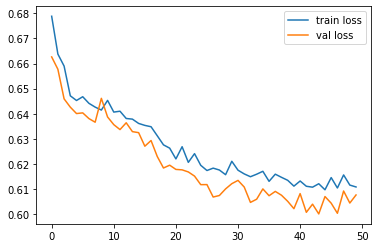

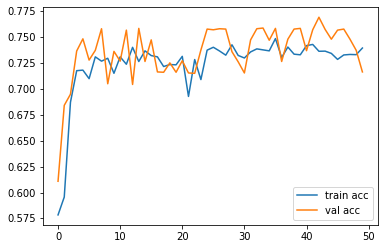

In [302]:
plot_loss_acc(train_losses,val_losses,train_accs,val_accs)

In [303]:
y,predicted,acc = test_model(both_model,criterion,test_loader)
results["Both Clinical and Gene Reduced Expresssion"]["DL"] = acc

Test | Loss:6.25e-01 | Acc: 0.71|: 100%|██████████| 1/1 [00:00<00:00, 102.73batch/s]


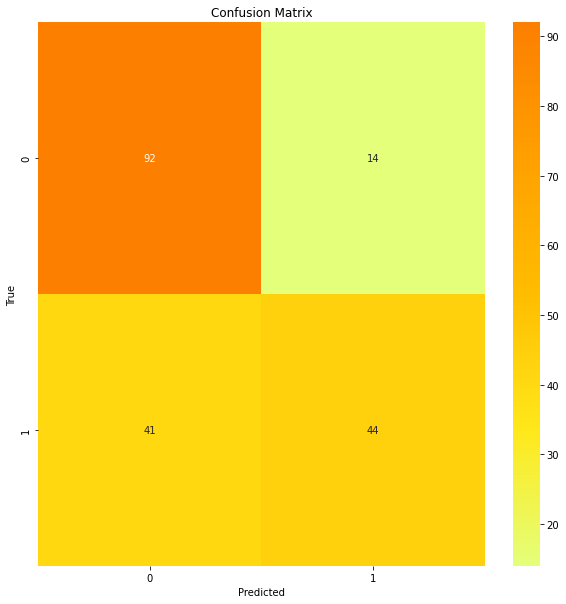

In [304]:
conf_matrix(y,predicted)

#### on gene_expression_reduced ####

In [312]:
# define dataset
dataset = genDataset(x_gene_expression_reduced.values, y_gene_expression_reduced.values)

# split dataset into train validation and test
train_size = int(0.85 * len(dataset))
val_size = int(0.05 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# define dataloader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size= test_dataset.__len__(), shuffle=True)

# define model
input_size = 10
gene_reduced_model = Model(input_size, 2 , "gene_only_reduced").to(device)

# define hyper parameters
n_epochs = 75
lr = 0.001

# define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(gene_reduced_model.parameters(), lr=lr , weight_decay=0.0001)

# train 
train_losses,val_losses,train_accs,val_accs = train_model(gene_reduced_model,criterion,
                                                          optimizer,n_epochs,train_loader,val_loader)

Train 0 | Loss:6.92e-01 | Acc: 0.57|: 100%|██████████| 51/51 [00:00<00:00, 209.71batch/s]
Val 0 | Loss:6.91e-01 | Acc: 0.60|: 100%|██████████| 3/3 [00:00<00:00, 301.14batch/s]


----------------------------[Epoch0 finished!]----------------------------


Train 1 | Loss:6.92e-01 | Acc: 0.58|: 100%|██████████| 51/51 [00:00<00:00, 204.28batch/s]
Val 1 | Loss:6.91e-01 | Acc: 0.60|: 100%|██████████| 3/3 [00:00<00:00, 269.70batch/s]


----------------------------[Epoch1 finished!]----------------------------


Train 2 | Loss:6.92e-01 | Acc: 0.58|: 100%|██████████| 51/51 [00:00<00:00, 197.79batch/s]
Val 2 | Loss:6.91e-01 | Acc: 0.59|: 100%|██████████| 3/3 [00:00<00:00, 263.73batch/s]


----------------------------[Epoch2 finished!]----------------------------


Train 3 | Loss:6.91e-01 | Acc: 0.58|: 100%|██████████| 51/51 [00:00<00:00, 183.54batch/s]
Val 3 | Loss:6.90e-01 | Acc: 0.59|: 100%|██████████| 3/3 [00:00<00:00, 262.39batch/s]


----------------------------[Epoch3 finished!]----------------------------


Train 4 | Loss:6.91e-01 | Acc: 0.58|: 100%|██████████| 51/51 [00:00<00:00, 154.03batch/s]
Val 4 | Loss:6.90e-01 | Acc: 0.60|: 100%|██████████| 3/3 [00:00<00:00, 299.28batch/s]


----------------------------[Epoch4 finished!]----------------------------


Train 5 | Loss:6.91e-01 | Acc: 0.57|: 100%|██████████| 51/51 [00:00<00:00, 162.37batch/s]
Val 5 | Loss:6.89e-01 | Acc: 0.60|: 100%|██████████| 3/3 [00:00<00:00, 290.69batch/s]


----------------------------[Epoch5 finished!]----------------------------


Train 6 | Loss:6.90e-01 | Acc: 0.58|: 100%|██████████| 51/51 [00:00<00:00, 154.90batch/s]
Val 6 | Loss:6.89e-01 | Acc: 0.59|: 100%|██████████| 3/3 [00:00<00:00, 285.98batch/s]


----------------------------[Epoch6 finished!]----------------------------


Train 7 | Loss:6.90e-01 | Acc: 0.58|: 100%|██████████| 51/51 [00:00<00:00, 175.68batch/s]
Val 7 | Loss:6.89e-01 | Acc: 0.59|: 100%|██████████| 3/3 [00:00<00:00, 255.37batch/s]


----------------------------[Epoch7 finished!]----------------------------


Train 8 | Loss:6.89e-01 | Acc: 0.58|: 100%|██████████| 51/51 [00:00<00:00, 176.05batch/s]
Val 8 | Loss:6.89e-01 | Acc: 0.59|: 100%|██████████| 3/3 [00:00<00:00, 193.10batch/s]


----------------------------[Epoch8 finished!]----------------------------


Train 9 | Loss:6.88e-01 | Acc: 0.58|: 100%|██████████| 51/51 [00:00<00:00, 174.31batch/s]
Val 9 | Loss:6.88e-01 | Acc: 0.59|: 100%|██████████| 3/3 [00:00<00:00, 274.93batch/s]


----------------------------[Epoch9 finished!]----------------------------


Train 10 | Loss:6.87e-01 | Acc: 0.58|: 100%|██████████| 51/51 [00:00<00:00, 173.81batch/s]
Val 10 | Loss:6.86e-01 | Acc: 0.59|: 100%|██████████| 3/3 [00:00<00:00, 203.68batch/s]


----------------------------[Epoch10 finished!]----------------------------


Train 11 | Loss:6.86e-01 | Acc: 0.58|: 100%|██████████| 51/51 [00:00<00:00, 173.79batch/s]
Val 11 | Loss:6.85e-01 | Acc: 0.59|: 100%|██████████| 3/3 [00:00<00:00, 228.41batch/s]


----------------------------[Epoch11 finished!]----------------------------


Train 12 | Loss:6.85e-01 | Acc: 0.58|: 100%|██████████| 51/51 [00:00<00:00, 174.91batch/s]
Val 12 | Loss:6.84e-01 | Acc: 0.59|: 100%|██████████| 3/3 [00:00<00:00, 178.07batch/s]


----------------------------[Epoch12 finished!]----------------------------


Train 13 | Loss:6.84e-01 | Acc: 0.59|: 100%|██████████| 51/51 [00:00<00:00, 167.48batch/s]
Val 13 | Loss:6.83e-01 | Acc: 0.59|: 100%|██████████| 3/3 [00:00<00:00, 308.27batch/s]


----------------------------[Epoch13 finished!]----------------------------


Train 14 | Loss:6.83e-01 | Acc: 0.59|: 100%|██████████| 51/51 [00:00<00:00, 175.66batch/s]
Val 14 | Loss:6.83e-01 | Acc: 0.59|: 100%|██████████| 3/3 [00:00<00:00, 229.85batch/s]


----------------------------[Epoch14 finished!]----------------------------


Train 15 | Loss:6.82e-01 | Acc: 0.60|: 100%|██████████| 51/51 [00:00<00:00, 170.89batch/s]
Val 15 | Loss:6.82e-01 | Acc: 0.58|: 100%|██████████| 3/3 [00:00<00:00, 236.47batch/s]


----------------------------[Epoch15 finished!]----------------------------


Train 16 | Loss:6.81e-01 | Acc: 0.60|: 100%|██████████| 51/51 [00:00<00:00, 185.36batch/s]
Val 16 | Loss:6.81e-01 | Acc: 0.61|: 100%|██████████| 3/3 [00:00<00:00, 245.88batch/s]


----------------------------[Epoch16 finished!]----------------------------


Train 17 | Loss:6.79e-01 | Acc: 0.61|: 100%|██████████| 51/51 [00:00<00:00, 178.37batch/s]
Val 17 | Loss:6.79e-01 | Acc: 0.64|: 100%|██████████| 3/3 [00:00<00:00, 232.06batch/s]


----------------------------[Epoch17 finished!]----------------------------


Train 18 | Loss:6.78e-01 | Acc: 0.61|: 100%|██████████| 51/51 [00:00<00:00, 164.73batch/s]
Val 18 | Loss:6.78e-01 | Acc: 0.61|: 100%|██████████| 3/3 [00:00<00:00, 152.04batch/s]


----------------------------[Epoch18 finished!]----------------------------


Train 19 | Loss:6.77e-01 | Acc: 0.62|: 100%|██████████| 51/51 [00:00<00:00, 186.22batch/s]
Val 19 | Loss:6.78e-01 | Acc: 0.61|: 100%|██████████| 3/3 [00:00<00:00, 357.64batch/s]


----------------------------[Epoch19 finished!]----------------------------


Train 20 | Loss:6.76e-01 | Acc: 0.62|: 100%|██████████| 51/51 [00:00<00:00, 186.53batch/s]
Val 20 | Loss:6.77e-01 | Acc: 0.61|: 100%|██████████| 3/3 [00:00<00:00, 303.89batch/s]


----------------------------[Epoch20 finished!]----------------------------


Train 21 | Loss:6.75e-01 | Acc: 0.62|: 100%|██████████| 51/51 [00:00<00:00, 172.52batch/s]
Val 21 | Loss:6.77e-01 | Acc: 0.62|: 100%|██████████| 3/3 [00:00<00:00, 235.11batch/s]


----------------------------[Epoch21 finished!]----------------------------


Train 22 | Loss:6.74e-01 | Acc: 0.62|: 100%|██████████| 51/51 [00:00<00:00, 187.03batch/s]
Val 22 | Loss:6.76e-01 | Acc: 0.63|: 100%|██████████| 3/3 [00:00<00:00, 256.31batch/s]


----------------------------[Epoch22 finished!]----------------------------


Train 23 | Loss:6.74e-01 | Acc: 0.62|: 100%|██████████| 51/51 [00:00<00:00, 180.50batch/s]
Val 23 | Loss:6.76e-01 | Acc: 0.63|: 100%|██████████| 3/3 [00:00<00:00, 341.01batch/s]


----------------------------[Epoch23 finished!]----------------------------


Train 24 | Loss:6.73e-01 | Acc: 0.63|: 100%|██████████| 51/51 [00:00<00:00, 179.37batch/s]
Val 24 | Loss:6.75e-01 | Acc: 0.61|: 100%|██████████| 3/3 [00:00<00:00, 255.63batch/s]


----------------------------[Epoch24 finished!]----------------------------


Train 25 | Loss:6.73e-01 | Acc: 0.63|: 100%|██████████| 51/51 [00:00<00:00, 156.77batch/s]
Val 25 | Loss:6.75e-01 | Acc: 0.61|: 100%|██████████| 3/3 [00:00<00:00, 251.53batch/s]


----------------------------[Epoch25 finished!]----------------------------


Train 26 | Loss:6.72e-01 | Acc: 0.62|: 100%|██████████| 51/51 [00:00<00:00, 168.00batch/s]
Val 26 | Loss:6.74e-01 | Acc: 0.61|: 100%|██████████| 3/3 [00:00<00:00, 288.78batch/s]


----------------------------[Epoch26 finished!]----------------------------


Train 27 | Loss:6.72e-01 | Acc: 0.63|: 100%|██████████| 51/51 [00:00<00:00, 168.63batch/s]
Val 27 | Loss:6.74e-01 | Acc: 0.61|: 100%|██████████| 3/3 [00:00<00:00, 198.13batch/s]


----------------------------[Epoch27 finished!]----------------------------


Train 28 | Loss:6.71e-01 | Acc: 0.63|: 100%|██████████| 51/51 [00:00<00:00, 176.21batch/s]
Val 28 | Loss:6.74e-01 | Acc: 0.61|: 100%|██████████| 3/3 [00:00<00:00, 271.01batch/s]


----------------------------[Epoch28 finished!]----------------------------


Train 29 | Loss:6.71e-01 | Acc: 0.63|: 100%|██████████| 51/51 [00:00<00:00, 185.84batch/s]
Val 29 | Loss:6.73e-01 | Acc: 0.60|: 100%|██████████| 3/3 [00:00<00:00, 293.74batch/s]


----------------------------[Epoch29 finished!]----------------------------


Train 30 | Loss:6.70e-01 | Acc: 0.63|: 100%|██████████| 51/51 [00:00<00:00, 187.24batch/s]
Val 30 | Loss:6.74e-01 | Acc: 0.61|: 100%|██████████| 3/3 [00:00<00:00, 254.31batch/s]


----------------------------[Epoch30 finished!]----------------------------


Train 31 | Loss:6.70e-01 | Acc: 0.63|: 100%|██████████| 51/51 [00:00<00:00, 179.82batch/s]
Val 31 | Loss:6.73e-01 | Acc: 0.61|: 100%|██████████| 3/3 [00:00<00:00, 276.93batch/s]


----------------------------[Epoch31 finished!]----------------------------


Train 32 | Loss:6.70e-01 | Acc: 0.63|: 100%|██████████| 51/51 [00:00<00:00, 180.49batch/s]
Val 32 | Loss:6.73e-01 | Acc: 0.61|: 100%|██████████| 3/3 [00:00<00:00, 245.21batch/s]


----------------------------[Epoch32 finished!]----------------------------


Train 33 | Loss:6.70e-01 | Acc: 0.63|: 100%|██████████| 51/51 [00:00<00:00, 177.94batch/s]
Val 33 | Loss:6.72e-01 | Acc: 0.61|: 100%|██████████| 3/3 [00:00<00:00, 262.44batch/s]


----------------------------[Epoch33 finished!]----------------------------


Train 34 | Loss:6.70e-01 | Acc: 0.63|: 100%|██████████| 51/51 [00:00<00:00, 180.30batch/s]
Val 34 | Loss:6.72e-01 | Acc: 0.61|: 100%|██████████| 3/3 [00:00<00:00, 280.93batch/s]


----------------------------[Epoch34 finished!]----------------------------


Train 35 | Loss:6.69e-01 | Acc: 0.63|: 100%|██████████| 51/51 [00:00<00:00, 178.10batch/s]
Val 35 | Loss:6.72e-01 | Acc: 0.61|: 100%|██████████| 3/3 [00:00<00:00, 279.78batch/s]


----------------------------[Epoch35 finished!]----------------------------


Train 36 | Loss:6.69e-01 | Acc: 0.63|: 100%|██████████| 51/51 [00:00<00:00, 180.95batch/s]
Val 36 | Loss:6.72e-01 | Acc: 0.60|: 100%|██████████| 3/3 [00:00<00:00, 272.26batch/s]


----------------------------[Epoch36 finished!]----------------------------


Train 37 | Loss:6.69e-01 | Acc: 0.63|: 100%|██████████| 51/51 [00:00<00:00, 171.47batch/s]
Val 37 | Loss:6.71e-01 | Acc: 0.61|: 100%|██████████| 3/3 [00:00<00:00, 233.71batch/s]


----------------------------[Epoch37 finished!]----------------------------


Train 38 | Loss:6.69e-01 | Acc: 0.63|: 100%|██████████| 51/51 [00:00<00:00, 184.40batch/s]
Val 38 | Loss:6.71e-01 | Acc: 0.62|: 100%|██████████| 3/3 [00:00<00:00, 290.50batch/s]


----------------------------[Epoch38 finished!]----------------------------


Train 39 | Loss:6.69e-01 | Acc: 0.63|: 100%|██████████| 51/51 [00:00<00:00, 189.21batch/s]
Val 39 | Loss:6.71e-01 | Acc: 0.61|: 100%|██████████| 3/3 [00:00<00:00, 252.46batch/s]


----------------------------[Epoch39 finished!]----------------------------


Train 40 | Loss:6.69e-01 | Acc: 0.63|: 100%|██████████| 51/51 [00:00<00:00, 204.86batch/s]
Val 40 | Loss:6.71e-01 | Acc: 0.61|: 100%|██████████| 3/3 [00:00<00:00, 263.74batch/s]


----------------------------[Epoch40 finished!]----------------------------


Train 41 | Loss:6.68e-01 | Acc: 0.63|: 100%|██████████| 51/51 [00:00<00:00, 185.06batch/s]
Val 41 | Loss:6.71e-01 | Acc: 0.60|: 100%|██████████| 3/3 [00:00<00:00, 261.08batch/s]


----------------------------[Epoch41 finished!]----------------------------


Train 42 | Loss:6.69e-01 | Acc: 0.63|: 100%|██████████| 51/51 [00:00<00:00, 203.08batch/s]
Val 42 | Loss:6.71e-01 | Acc: 0.60|: 100%|██████████| 3/3 [00:00<00:00, 273.26batch/s]


----------------------------[Epoch42 finished!]----------------------------


Train 43 | Loss:6.68e-01 | Acc: 0.63|: 100%|██████████| 51/51 [00:00<00:00, 198.18batch/s]
Val 43 | Loss:6.71e-01 | Acc: 0.59|: 100%|██████████| 3/3 [00:00<00:00, 273.55batch/s]


----------------------------[Epoch43 finished!]----------------------------


Train 44 | Loss:6.68e-01 | Acc: 0.63|: 100%|██████████| 51/51 [00:00<00:00, 190.98batch/s]
Val 44 | Loss:6.70e-01 | Acc: 0.59|: 100%|██████████| 3/3 [00:00<00:00, 279.74batch/s]


----------------------------[Epoch44 finished!]----------------------------


Train 45 | Loss:6.68e-01 | Acc: 0.64|: 100%|██████████| 51/51 [00:00<00:00, 188.72batch/s]
Val 45 | Loss:6.70e-01 | Acc: 0.59|: 100%|██████████| 3/3 [00:00<00:00, 251.30batch/s]


----------------------------[Epoch45 finished!]----------------------------


Train 46 | Loss:6.68e-01 | Acc: 0.63|: 100%|██████████| 51/51 [00:00<00:00, 182.78batch/s]
Val 46 | Loss:6.70e-01 | Acc: 0.59|: 100%|██████████| 3/3 [00:00<00:00, 273.37batch/s]


----------------------------[Epoch46 finished!]----------------------------


Train 47 | Loss:6.68e-01 | Acc: 0.64|: 100%|██████████| 51/51 [00:00<00:00, 205.90batch/s]
Val 47 | Loss:6.70e-01 | Acc: 0.59|: 100%|██████████| 3/3 [00:00<00:00, 241.68batch/s]


----------------------------[Epoch47 finished!]----------------------------


Train 48 | Loss:6.68e-01 | Acc: 0.63|: 100%|██████████| 51/51 [00:00<00:00, 199.26batch/s]
Val 48 | Loss:6.70e-01 | Acc: 0.59|: 100%|██████████| 3/3 [00:00<00:00, 369.15batch/s]


----------------------------[Epoch48 finished!]----------------------------


Train 49 | Loss:6.67e-01 | Acc: 0.64|: 100%|██████████| 51/51 [00:00<00:00, 196.98batch/s]
Val 49 | Loss:6.70e-01 | Acc: 0.59|: 100%|██████████| 3/3 [00:00<00:00, 278.16batch/s]


----------------------------[Epoch49 finished!]----------------------------


Train 50 | Loss:6.68e-01 | Acc: 0.64|: 100%|██████████| 51/51 [00:00<00:00, 205.91batch/s]
Val 50 | Loss:6.70e-01 | Acc: 0.60|: 100%|██████████| 3/3 [00:00<00:00, 267.20batch/s]


----------------------------[Epoch50 finished!]----------------------------


Train 51 | Loss:6.68e-01 | Acc: 0.64|: 100%|██████████| 51/51 [00:00<00:00, 194.71batch/s]
Val 51 | Loss:6.70e-01 | Acc: 0.58|: 100%|██████████| 3/3 [00:00<00:00, 268.96batch/s]


----------------------------[Epoch51 finished!]----------------------------


Train 52 | Loss:6.67e-01 | Acc: 0.64|: 100%|██████████| 51/51 [00:00<00:00, 188.19batch/s]
Val 52 | Loss:6.69e-01 | Acc: 0.61|: 100%|██████████| 3/3 [00:00<00:00, 276.67batch/s]


----------------------------[Epoch52 finished!]----------------------------


Train 53 | Loss:6.68e-01 | Acc: 0.64|: 100%|██████████| 51/51 [00:00<00:00, 192.13batch/s]
Val 53 | Loss:6.69e-01 | Acc: 0.61|: 100%|██████████| 3/3 [00:00<00:00, 271.71batch/s]


----------------------------[Epoch53 finished!]----------------------------


Train 54 | Loss:6.67e-01 | Acc: 0.64|: 100%|██████████| 51/51 [00:00<00:00, 189.15batch/s]
Val 54 | Loss:6.69e-01 | Acc: 0.61|: 100%|██████████| 3/3 [00:00<00:00, 257.54batch/s]


----------------------------[Epoch54 finished!]----------------------------


Train 55 | Loss:6.67e-01 | Acc: 0.64|: 100%|██████████| 51/51 [00:00<00:00, 173.55batch/s]
Val 55 | Loss:6.69e-01 | Acc: 0.61|: 100%|██████████| 3/3 [00:00<00:00, 189.82batch/s]


----------------------------[Epoch55 finished!]----------------------------


Train 56 | Loss:6.67e-01 | Acc: 0.64|: 100%|██████████| 51/51 [00:00<00:00, 179.26batch/s]
Val 56 | Loss:6.69e-01 | Acc: 0.61|: 100%|██████████| 3/3 [00:00<00:00, 200.10batch/s]


----------------------------[Epoch56 finished!]----------------------------


Train 57 | Loss:6.67e-01 | Acc: 0.64|: 100%|██████████| 51/51 [00:00<00:00, 183.91batch/s]
Val 57 | Loss:6.69e-01 | Acc: 0.61|: 100%|██████████| 3/3 [00:00<00:00, 203.52batch/s]


----------------------------[Epoch57 finished!]----------------------------


Train 58 | Loss:6.67e-01 | Acc: 0.64|: 100%|██████████| 51/51 [00:00<00:00, 181.54batch/s]
Val 58 | Loss:6.69e-01 | Acc: 0.61|: 100%|██████████| 3/3 [00:00<00:00, 251.79batch/s]


----------------------------[Epoch58 finished!]----------------------------


Train 59 | Loss:6.67e-01 | Acc: 0.64|: 100%|██████████| 51/51 [00:00<00:00, 188.33batch/s]
Val 59 | Loss:6.69e-01 | Acc: 0.60|: 100%|██████████| 3/3 [00:00<00:00, 223.33batch/s]


----------------------------[Epoch59 finished!]----------------------------


Train 60 | Loss:6.67e-01 | Acc: 0.64|: 100%|██████████| 51/51 [00:00<00:00, 190.21batch/s]
Val 60 | Loss:6.69e-01 | Acc: 0.60|: 100%|██████████| 3/3 [00:00<00:00, 248.45batch/s]


----------------------------[Epoch60 finished!]----------------------------


Train 61 | Loss:6.67e-01 | Acc: 0.64|: 100%|██████████| 51/51 [00:00<00:00, 183.20batch/s]
Val 61 | Loss:6.68e-01 | Acc: 0.61|: 100%|██████████| 3/3 [00:00<00:00, 204.94batch/s]


----------------------------[Epoch61 finished!]----------------------------


Train 62 | Loss:6.67e-01 | Acc: 0.64|: 100%|██████████| 51/51 [00:00<00:00, 183.72batch/s]
Val 62 | Loss:6.69e-01 | Acc: 0.61|: 100%|██████████| 3/3 [00:00<00:00, 201.61batch/s]


----------------------------[Epoch62 finished!]----------------------------


Train 63 | Loss:6.67e-01 | Acc: 0.64|: 100%|██████████| 51/51 [00:00<00:00, 197.08batch/s]
Val 63 | Loss:6.68e-01 | Acc: 0.61|: 100%|██████████| 3/3 [00:00<00:00, 295.71batch/s]


----------------------------[Epoch63 finished!]----------------------------


Train 64 | Loss:6.66e-01 | Acc: 0.64|: 100%|██████████| 51/51 [00:00<00:00, 190.08batch/s]
Val 64 | Loss:6.68e-01 | Acc: 0.62|: 100%|██████████| 3/3 [00:00<00:00, 263.94batch/s]


----------------------------[Epoch64 finished!]----------------------------


Train 65 | Loss:6.67e-01 | Acc: 0.64|: 100%|██████████| 51/51 [00:00<00:00, 208.70batch/s]
Val 65 | Loss:6.68e-01 | Acc: 0.61|: 100%|██████████| 3/3 [00:00<00:00, 251.63batch/s]


----------------------------[Epoch65 finished!]----------------------------


Train 66 | Loss:6.67e-01 | Acc: 0.64|: 100%|██████████| 51/51 [00:00<00:00, 185.96batch/s]
Val 66 | Loss:6.68e-01 | Acc: 0.62|: 100%|██████████| 3/3 [00:00<00:00, 267.78batch/s]


----------------------------[Epoch66 finished!]----------------------------


Train 67 | Loss:6.67e-01 | Acc: 0.64|: 100%|██████████| 51/51 [00:00<00:00, 201.77batch/s]
Val 67 | Loss:6.68e-01 | Acc: 0.62|: 100%|██████████| 3/3 [00:00<00:00, 249.83batch/s]


----------------------------[Epoch67 finished!]----------------------------


Train 68 | Loss:6.67e-01 | Acc: 0.64|: 100%|██████████| 51/51 [00:00<00:00, 200.80batch/s]
Val 68 | Loss:6.68e-01 | Acc: 0.62|: 100%|██████████| 3/3 [00:00<00:00, 286.36batch/s]


----------------------------[Epoch68 finished!]----------------------------


Train 69 | Loss:6.66e-01 | Acc: 0.64|: 100%|██████████| 51/51 [00:00<00:00, 205.92batch/s]
Val 69 | Loss:6.68e-01 | Acc: 0.62|: 100%|██████████| 3/3 [00:00<00:00, 277.40batch/s]


----------------------------[Epoch69 finished!]----------------------------


Train 70 | Loss:6.67e-01 | Acc: 0.64|: 100%|██████████| 51/51 [00:00<00:00, 191.53batch/s]
Val 70 | Loss:6.68e-01 | Acc: 0.62|: 100%|██████████| 3/3 [00:00<00:00, 217.66batch/s]


----------------------------[Epoch70 finished!]----------------------------


Train 71 | Loss:6.66e-01 | Acc: 0.64|: 100%|██████████| 51/51 [00:00<00:00, 172.37batch/s]
Val 71 | Loss:6.68e-01 | Acc: 0.62|: 100%|██████████| 3/3 [00:00<00:00, 197.15batch/s]


----------------------------[Epoch71 finished!]----------------------------


Train 72 | Loss:6.67e-01 | Acc: 0.64|: 100%|██████████| 51/51 [00:00<00:00, 197.04batch/s]
Val 72 | Loss:6.68e-01 | Acc: 0.62|: 100%|██████████| 3/3 [00:00<00:00, 289.78batch/s]


----------------------------[Epoch72 finished!]----------------------------


Train 73 | Loss:6.66e-01 | Acc: 0.64|: 100%|██████████| 51/51 [00:00<00:00, 157.07batch/s]
Val 73 | Loss:6.68e-01 | Acc: 0.61|: 100%|██████████| 3/3 [00:00<00:00, 245.16batch/s]


----------------------------[Epoch73 finished!]----------------------------


Train 74 | Loss:6.66e-01 | Acc: 0.64|: 100%|██████████| 51/51 [00:00<00:00, 162.48batch/s]
Val 74 | Loss:6.68e-01 | Acc: 0.62|: 100%|██████████| 3/3 [00:00<00:00, 231.52batch/s]

----------------------------[Epoch74 finished!]----------------------------


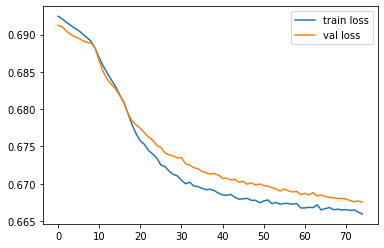

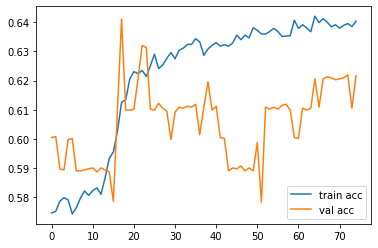

In [313]:
plot_loss_acc(train_losses,val_losses,train_accs,val_accs)

In [314]:
y, predicted, acc = test_model(gene_reduced_model,criterion,test_loader)
results["Reduced Gene Expression"]["DL"] = acc

Test | Loss:6.66e-01 | Acc: 0.62|: 100%|██████████| 1/1 [00:00<00:00, 76.63batch/s]


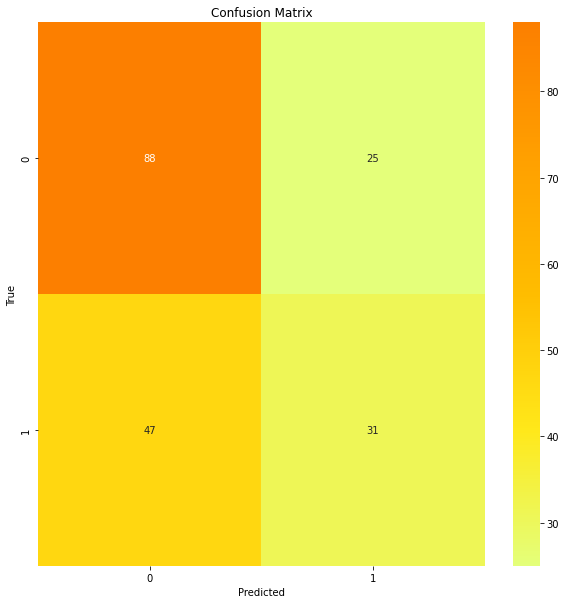

In [315]:
conf_matrix(y,predicted)

#### only on gene_not_reduced ####

In [317]:
# define dataset
dataset = genDataset(x_gene_expression_not_reduced.values, y_gene_expression_not_reduced.values)

# split dataset into train validation and test
train_size = int(0.85 * len(dataset))
val_size = int(0.05 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# define dataloader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size= test_dataset.__len__(), shuffle=True)

# define model
input_size = 489
gene_not_reduced_model = Model(input_size, 2 , "gene_only_not_reduced").to(device)

# define hyper parameters
n_epochs = 50
lr = 0.001

# define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(gene_not_reduced_model.parameters(), lr=lr , weight_decay=0.0001)

# train 
train_losses,val_losses,train_accs,val_accs = train_model(gene_not_reduced_model,criterion,
                                                          optimizer,n_epochs,train_loader,val_loader)

Train 0 | Loss:6.83e-01 | Acc: 0.58|: 100%|██████████| 51/51 [00:00<00:00, 112.76batch/s]
Val 0 | Loss:6.73e-01 | Acc: 0.55|: 100%|██████████| 3/3 [00:00<00:00, 165.53batch/s]


----------------------------[Epoch0 finished!]----------------------------


Train 1 | Loss:6.61e-01 | Acc: 0.63|: 100%|██████████| 51/51 [00:00<00:00, 111.61batch/s]
Val 1 | Loss:6.67e-01 | Acc: 0.65|: 100%|██████████| 3/3 [00:00<00:00, 204.15batch/s]


----------------------------[Epoch1 finished!]----------------------------


Train 2 | Loss:6.36e-01 | Acc: 0.72|: 100%|██████████| 51/51 [00:00<00:00, 112.35batch/s]
Val 2 | Loss:6.41e-01 | Acc: 0.72|: 100%|██████████| 3/3 [00:00<00:00, 168.90batch/s]


----------------------------[Epoch2 finished!]----------------------------


Train 3 | Loss:6.30e-01 | Acc: 0.71|: 100%|██████████| 51/51 [00:00<00:00, 93.94batch/s]
Val 3 | Loss:6.51e-01 | Acc: 0.65|: 100%|██████████| 3/3 [00:00<00:00, 149.61batch/s]


----------------------------[Epoch3 finished!]----------------------------


Train 4 | Loss:6.27e-01 | Acc: 0.71|: 100%|██████████| 51/51 [00:00<00:00, 107.00batch/s]
Val 4 | Loss:6.52e-01 | Acc: 0.65|: 100%|██████████| 3/3 [00:00<00:00, 233.64batch/s]


----------------------------[Epoch4 finished!]----------------------------


Train 5 | Loss:6.33e-01 | Acc: 0.70|: 100%|██████████| 51/51 [00:00<00:00, 108.08batch/s]
Val 5 | Loss:6.61e-01 | Acc: 0.64|: 100%|██████████| 3/3 [00:00<00:00, 215.05batch/s]


----------------------------[Epoch5 finished!]----------------------------


Train 6 | Loss:6.33e-01 | Acc: 0.70|: 100%|██████████| 51/51 [00:00<00:00, 107.90batch/s]
Val 6 | Loss:6.58e-01 | Acc: 0.64|: 100%|██████████| 3/3 [00:00<00:00, 208.18batch/s]


----------------------------[Epoch6 finished!]----------------------------


Train 7 | Loss:6.20e-01 | Acc: 0.73|: 100%|██████████| 51/51 [00:00<00:00, 109.34batch/s]
Val 7 | Loss:6.52e-01 | Acc: 0.66|: 100%|██████████| 3/3 [00:00<00:00, 190.66batch/s]


----------------------------[Epoch7 finished!]----------------------------


Train 8 | Loss:6.14e-01 | Acc: 0.75|: 100%|██████████| 51/51 [00:00<00:00, 108.58batch/s]
Val 8 | Loss:6.55e-01 | Acc: 0.64|: 100%|██████████| 3/3 [00:00<00:00, 195.96batch/s]


----------------------------[Epoch8 finished!]----------------------------


Train 9 | Loss:6.09e-01 | Acc: 0.75|: 100%|██████████| 51/51 [00:00<00:00, 105.39batch/s]
Val 9 | Loss:6.51e-01 | Acc: 0.65|: 100%|██████████| 3/3 [00:00<00:00, 152.74batch/s]


----------------------------[Epoch9 finished!]----------------------------


Train 10 | Loss:6.12e-01 | Acc: 0.74|: 100%|██████████| 51/51 [00:00<00:00, 105.72batch/s]
Val 10 | Loss:6.52e-01 | Acc: 0.65|: 100%|██████████| 3/3 [00:00<00:00, 135.88batch/s]


----------------------------[Epoch10 finished!]----------------------------


Train 11 | Loss:6.11e-01 | Acc: 0.73|: 100%|██████████| 51/51 [00:00<00:00, 112.40batch/s]
Val 11 | Loss:6.39e-01 | Acc: 0.67|: 100%|██████████| 3/3 [00:00<00:00, 222.45batch/s]


----------------------------[Epoch11 finished!]----------------------------


Train 12 | Loss:6.17e-01 | Acc: 0.72|: 100%|██████████| 51/51 [00:00<00:00, 107.25batch/s]
Val 12 | Loss:6.65e-01 | Acc: 0.61|: 100%|██████████| 3/3 [00:00<00:00, 157.30batch/s]


----------------------------[Epoch12 finished!]----------------------------


Train 13 | Loss:6.18e-01 | Acc: 0.72|: 100%|██████████| 51/51 [00:00<00:00, 110.15batch/s]
Val 13 | Loss:6.60e-01 | Acc: 0.62|: 100%|██████████| 3/3 [00:00<00:00, 181.07batch/s]


----------------------------[Epoch13 finished!]----------------------------


Train 14 | Loss:6.28e-01 | Acc: 0.70|: 100%|██████████| 51/51 [00:00<00:00, 108.33batch/s]
Val 14 | Loss:6.55e-01 | Acc: 0.64|: 100%|██████████| 3/3 [00:00<00:00, 231.83batch/s]


----------------------------[Epoch14 finished!]----------------------------


Train 15 | Loss:6.15e-01 | Acc: 0.72|: 100%|██████████| 51/51 [00:00<00:00, 110.90batch/s]
Val 15 | Loss:6.59e-01 | Acc: 0.62|: 100%|██████████| 3/3 [00:00<00:00, 207.58batch/s]


----------------------------[Epoch15 finished!]----------------------------


Train 16 | Loss:6.09e-01 | Acc: 0.74|: 100%|██████████| 51/51 [00:00<00:00, 104.96batch/s]
Val 16 | Loss:6.70e-01 | Acc: 0.60|: 100%|██████████| 3/3 [00:00<00:00, 182.80batch/s]


----------------------------[Epoch16 finished!]----------------------------


Train 17 | Loss:6.09e-01 | Acc: 0.74|: 100%|██████████| 51/51 [00:00<00:00, 80.73batch/s]
Val 17 | Loss:6.57e-01 | Acc: 0.63|: 100%|██████████| 3/3 [00:00<00:00, 120.88batch/s]


----------------------------[Epoch17 finished!]----------------------------


Train 18 | Loss:6.03e-01 | Acc: 0.75|: 100%|██████████| 51/51 [00:00<00:00, 88.01batch/s]
Val 18 | Loss:6.54e-01 | Acc: 0.63|: 100%|██████████| 3/3 [00:00<00:00, 155.77batch/s]


----------------------------[Epoch18 finished!]----------------------------


Train 19 | Loss:6.07e-01 | Acc: 0.74|: 100%|██████████| 51/51 [00:00<00:00, 95.25batch/s] 
Val 19 | Loss:6.58e-01 | Acc: 0.64|: 100%|██████████| 3/3 [00:00<00:00, 205.49batch/s]


----------------------------[Epoch19 finished!]----------------------------


Train 20 | Loss:6.07e-01 | Acc: 0.74|: 100%|██████████| 51/51 [00:00<00:00, 90.08batch/s]
Val 20 | Loss:6.70e-01 | Acc: 0.61|: 100%|██████████| 3/3 [00:00<00:00, 161.90batch/s]


----------------------------[Epoch20 finished!]----------------------------


Train 21 | Loss:6.05e-01 | Acc: 0.75|: 100%|██████████| 51/51 [00:00<00:00, 94.61batch/s]
Val 21 | Loss:6.70e-01 | Acc: 0.61|: 100%|██████████| 3/3 [00:00<00:00, 165.12batch/s]


----------------------------[Epoch21 finished!]----------------------------


Train 22 | Loss:6.04e-01 | Acc: 0.75|: 100%|██████████| 51/51 [00:00<00:00, 94.76batch/s]
Val 22 | Loss:6.62e-01 | Acc: 0.62|: 100%|██████████| 3/3 [00:00<00:00, 170.78batch/s]


----------------------------[Epoch22 finished!]----------------------------


Train 23 | Loss:6.01e-01 | Acc: 0.76|: 100%|██████████| 51/51 [00:00<00:00, 91.36batch/s]
Val 23 | Loss:6.77e-01 | Acc: 0.57|: 100%|██████████| 3/3 [00:00<00:00, 132.38batch/s]


----------------------------[Epoch23 finished!]----------------------------


Train 24 | Loss:6.06e-01 | Acc: 0.75|: 100%|██████████| 51/51 [00:00<00:00, 88.47batch/s]
Val 24 | Loss:6.72e-01 | Acc: 0.60|: 100%|██████████| 3/3 [00:00<00:00, 181.84batch/s]


----------------------------[Epoch24 finished!]----------------------------


Train 25 | Loss:5.97e-01 | Acc: 0.76|: 100%|██████████| 51/51 [00:00<00:00, 100.54batch/s]
Val 25 | Loss:6.69e-01 | Acc: 0.61|: 100%|██████████| 3/3 [00:00<00:00, 208.22batch/s]


----------------------------[Epoch25 finished!]----------------------------


Train 26 | Loss:5.90e-01 | Acc: 0.78|: 100%|██████████| 51/51 [00:00<00:00, 88.55batch/s]
Val 26 | Loss:6.57e-01 | Acc: 0.65|: 100%|██████████| 3/3 [00:00<00:00, 191.94batch/s]


----------------------------[Epoch26 finished!]----------------------------


Train 27 | Loss:5.88e-01 | Acc: 0.79|: 100%|██████████| 51/51 [00:00<00:00, 90.52batch/s]
Val 27 | Loss:6.62e-01 | Acc: 0.62|: 100%|██████████| 3/3 [00:00<00:00, 164.25batch/s]


----------------------------[Epoch27 finished!]----------------------------


Train 28 | Loss:5.92e-01 | Acc: 0.78|: 100%|██████████| 51/51 [00:00<00:00, 94.48batch/s]
Val 28 | Loss:6.41e-01 | Acc: 0.66|: 100%|██████████| 3/3 [00:00<00:00, 205.01batch/s]


----------------------------[Epoch28 finished!]----------------------------


Train 29 | Loss:6.05e-01 | Acc: 0.74|: 100%|██████████| 51/51 [00:00<00:00, 83.38batch/s]
Val 29 | Loss:6.63e-01 | Acc: 0.62|: 100%|██████████| 3/3 [00:00<00:00, 207.05batch/s]


----------------------------[Epoch29 finished!]----------------------------


Train 30 | Loss:6.02e-01 | Acc: 0.75|: 100%|██████████| 51/51 [00:00<00:00, 88.37batch/s]
Val 30 | Loss:6.61e-01 | Acc: 0.63|: 100%|██████████| 3/3 [00:00<00:00, 162.55batch/s]


----------------------------[Epoch30 finished!]----------------------------


Train 31 | Loss:6.05e-01 | Acc: 0.75|: 100%|██████████| 51/51 [00:00<00:00, 98.70batch/s]
Val 31 | Loss:6.56e-01 | Acc: 0.63|: 100%|██████████| 3/3 [00:00<00:00, 191.17batch/s]


----------------------------[Epoch31 finished!]----------------------------


Train 32 | Loss:6.00e-01 | Acc: 0.76|: 100%|██████████| 51/51 [00:00<00:00, 98.49batch/s]
Val 32 | Loss:6.60e-01 | Acc: 0.63|: 100%|██████████| 3/3 [00:00<00:00, 197.96batch/s]


----------------------------[Epoch32 finished!]----------------------------


Train 33 | Loss:5.92e-01 | Acc: 0.78|: 100%|██████████| 51/51 [00:00<00:00, 112.31batch/s]
Val 33 | Loss:6.50e-01 | Acc: 0.65|: 100%|██████████| 3/3 [00:00<00:00, 179.75batch/s]


----------------------------[Epoch33 finished!]----------------------------


Train 34 | Loss:5.90e-01 | Acc: 0.78|: 100%|██████████| 51/51 [00:00<00:00, 111.11batch/s]
Val 34 | Loss:6.54e-01 | Acc: 0.65|: 100%|██████████| 3/3 [00:00<00:00, 204.61batch/s]


----------------------------[Epoch34 finished!]----------------------------


Train 35 | Loss:5.86e-01 | Acc: 0.79|: 100%|██████████| 51/51 [00:00<00:00, 111.10batch/s]
Val 35 | Loss:6.57e-01 | Acc: 0.64|: 100%|██████████| 3/3 [00:00<00:00, 194.94batch/s]


----------------------------[Epoch35 finished!]----------------------------


Train 36 | Loss:5.87e-01 | Acc: 0.78|: 100%|██████████| 51/51 [00:00<00:00, 109.02batch/s]
Val 36 | Loss:6.48e-01 | Acc: 0.65|: 100%|██████████| 3/3 [00:00<00:00, 201.81batch/s]


----------------------------[Epoch36 finished!]----------------------------


Train 37 | Loss:6.25e-01 | Acc: 0.70|: 100%|██████████| 51/51 [00:00<00:00, 111.79batch/s]
Val 37 | Loss:6.38e-01 | Acc: 0.68|: 100%|██████████| 3/3 [00:00<00:00, 144.39batch/s]


----------------------------[Epoch37 finished!]----------------------------


Train 38 | Loss:6.12e-01 | Acc: 0.73|: 100%|██████████| 51/51 [00:00<00:00, 102.34batch/s]
Val 38 | Loss:6.57e-01 | Acc: 0.63|: 100%|██████████| 3/3 [00:00<00:00, 209.14batch/s]


----------------------------[Epoch38 finished!]----------------------------


Train 39 | Loss:6.27e-01 | Acc: 0.70|: 100%|██████████| 51/51 [00:00<00:00, 103.57batch/s]
Val 39 | Loss:6.45e-01 | Acc: 0.66|: 100%|██████████| 3/3 [00:00<00:00, 216.14batch/s]


----------------------------[Epoch39 finished!]----------------------------


Train 40 | Loss:6.17e-01 | Acc: 0.72|: 100%|██████████| 51/51 [00:00<00:00, 104.42batch/s]
Val 40 | Loss:6.59e-01 | Acc: 0.63|: 100%|██████████| 3/3 [00:00<00:00, 204.94batch/s]


----------------------------[Epoch40 finished!]----------------------------


Train 41 | Loss:6.18e-01 | Acc: 0.72|: 100%|██████████| 51/51 [00:00<00:00, 103.50batch/s]
Val 41 | Loss:6.52e-01 | Acc: 0.65|: 100%|██████████| 3/3 [00:00<00:00, 230.38batch/s]


----------------------------[Epoch41 finished!]----------------------------


Train 42 | Loss:6.18e-01 | Acc: 0.72|: 100%|██████████| 51/51 [00:00<00:00, 108.43batch/s]
Val 42 | Loss:6.46e-01 | Acc: 0.67|: 100%|██████████| 3/3 [00:00<00:00, 197.11batch/s]


----------------------------[Epoch42 finished!]----------------------------


Train 43 | Loss:6.10e-01 | Acc: 0.74|: 100%|██████████| 51/51 [00:00<00:00, 109.14batch/s]
Val 43 | Loss:6.54e-01 | Acc: 0.64|: 100%|██████████| 3/3 [00:00<00:00, 162.50batch/s]


----------------------------[Epoch43 finished!]----------------------------


Train 44 | Loss:6.05e-01 | Acc: 0.75|: 100%|██████████| 51/51 [00:00<00:00, 104.35batch/s]
Val 44 | Loss:6.62e-01 | Acc: 0.62|: 100%|██████████| 3/3 [00:00<00:00, 150.54batch/s]


----------------------------[Epoch44 finished!]----------------------------


Train 45 | Loss:5.97e-01 | Acc: 0.77|: 100%|██████████| 51/51 [00:00<00:00, 106.64batch/s]
Val 45 | Loss:6.53e-01 | Acc: 0.64|: 100%|██████████| 3/3 [00:00<00:00, 201.79batch/s]


----------------------------[Epoch45 finished!]----------------------------


Train 46 | Loss:5.95e-01 | Acc: 0.77|: 100%|██████████| 51/51 [00:00<00:00, 102.02batch/s]
Val 46 | Loss:6.63e-01 | Acc: 0.61|: 100%|██████████| 3/3 [00:00<00:00, 204.44batch/s]


----------------------------[Epoch46 finished!]----------------------------


Train 47 | Loss:5.93e-01 | Acc: 0.78|: 100%|██████████| 51/51 [00:00<00:00, 105.90batch/s]
Val 47 | Loss:6.66e-01 | Acc: 0.61|: 100%|██████████| 3/3 [00:00<00:00, 181.55batch/s]


----------------------------[Epoch47 finished!]----------------------------


Train 48 | Loss:5.90e-01 | Acc: 0.78|: 100%|██████████| 51/51 [00:00<00:00, 96.15batch/s] 
Val 48 | Loss:6.71e-01 | Acc: 0.60|: 100%|██████████| 3/3 [00:00<00:00, 185.36batch/s]


----------------------------[Epoch48 finished!]----------------------------


Train 49 | Loss:5.84e-01 | Acc: 0.79|: 100%|██████████| 51/51 [00:00<00:00, 105.35batch/s]
Val 49 | Loss:6.63e-01 | Acc: 0.62|: 100%|██████████| 3/3 [00:00<00:00, 182.73batch/s]

----------------------------[Epoch49 finished!]----------------------------


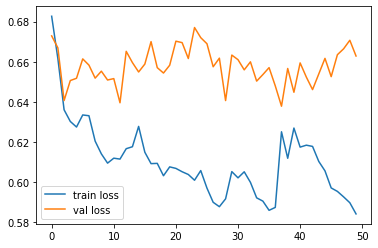

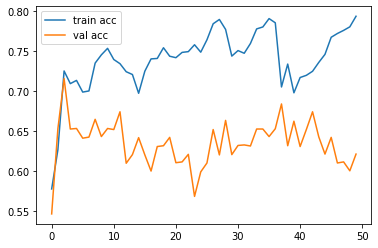

In [318]:
plot_loss_acc(train_losses,val_losses,train_accs,val_accs)

In [319]:
y,predicted,acc = test_model(gene_not_reduced_model,criterion,test_loader)
results["Not Reduced Gene Expression"]["DL"] = acc

Test | Loss:6.33e-01 | Acc: 0.69|: 100%|██████████| 1/1 [00:00<00:00, 68.34batch/s]


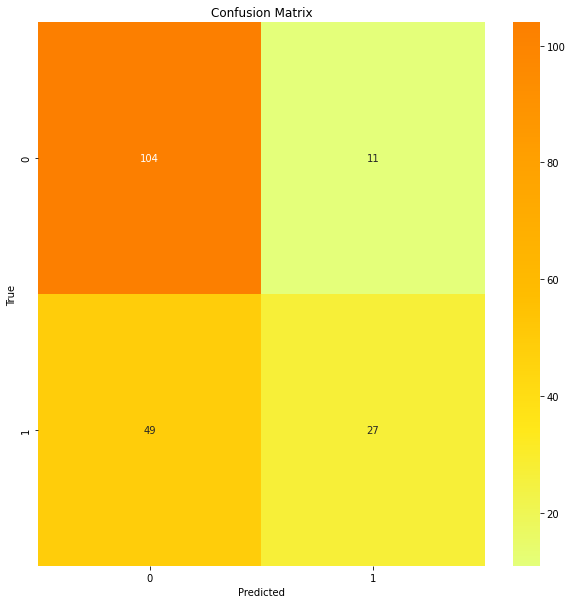

In [320]:
conf_matrix(y,predicted)

#### only clinical section ####

In [321]:
# define dataset
dataset = genDataset(x_clinical_section.values, y_clinical_section.values)

# split dataset into train validation and test
train_size = int(0.85 * len(dataset))
val_size = int(0.05 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# define dataloader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size= test_dataset.__len__(), shuffle=True)

# define model
input_size = 28
clinical_model = Model(input_size, 2 , "clinical_only").to(device)

# define hyper parameters
n_epochs = 50
lr = 0.001

# define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(clinical_model.parameters(), lr=lr , weight_decay=0.0001)

# train 
train_losses,val_losses,train_accs,val_accs = train_model(clinical_model,criterion,
                                                          optimizer,n_epochs,train_loader,val_loader)

Train 0 | Loss:6.74e-01 | Acc: 0.60|: 100%|██████████| 51/51 [00:00<00:00, 186.31batch/s]
Val 0 | Loss:6.64e-01 | Acc: 0.57|: 100%|██████████| 3/3 [00:00<00:00, 263.77batch/s]


----------------------------[Epoch0 finished!]----------------------------


Train 1 | Loss:6.64e-01 | Acc: 0.63|: 100%|██████████| 51/51 [00:00<00:00, 173.93batch/s]
Val 1 | Loss:6.64e-01 | Acc: 0.70|: 100%|██████████| 3/3 [00:00<00:00, 275.08batch/s]


----------------------------[Epoch1 finished!]----------------------------


Train 2 | Loss:6.64e-01 | Acc: 0.65|: 100%|██████████| 51/51 [00:00<00:00, 169.07batch/s]
Val 2 | Loss:6.63e-01 | Acc: 0.60|: 100%|██████████| 3/3 [00:00<00:00, 219.31batch/s]


----------------------------[Epoch2 finished!]----------------------------


Train 3 | Loss:6.63e-01 | Acc: 0.65|: 100%|██████████| 51/51 [00:00<00:00, 180.02batch/s]
Val 3 | Loss:6.61e-01 | Acc: 0.69|: 100%|██████████| 3/3 [00:00<00:00, 238.53batch/s]


----------------------------[Epoch3 finished!]----------------------------


Train 4 | Loss:6.63e-01 | Acc: 0.66|: 100%|██████████| 51/51 [00:00<00:00, 185.46batch/s]
Val 4 | Loss:6.60e-01 | Acc: 0.72|: 100%|██████████| 3/3 [00:00<00:00, 284.46batch/s]


----------------------------[Epoch4 finished!]----------------------------


Train 5 | Loss:6.56e-01 | Acc: 0.68|: 100%|██████████| 51/51 [00:00<00:00, 158.57batch/s]
Val 5 | Loss:6.49e-01 | Acc: 0.73|: 100%|██████████| 3/3 [00:00<00:00, 289.96batch/s]


----------------------------[Epoch5 finished!]----------------------------


Train 6 | Loss:6.51e-01 | Acc: 0.70|: 100%|██████████| 51/51 [00:00<00:00, 178.12batch/s]
Val 6 | Loss:6.46e-01 | Acc: 0.75|: 100%|██████████| 3/3 [00:00<00:00, 242.76batch/s]


----------------------------[Epoch6 finished!]----------------------------


Train 7 | Loss:6.50e-01 | Acc: 0.70|: 100%|██████████| 51/51 [00:00<00:00, 179.81batch/s]
Val 7 | Loss:6.45e-01 | Acc: 0.75|: 100%|██████████| 3/3 [00:00<00:00, 242.01batch/s]


----------------------------[Epoch7 finished!]----------------------------


Train 8 | Loss:6.51e-01 | Acc: 0.70|: 100%|██████████| 51/51 [00:00<00:00, 175.47batch/s]
Val 8 | Loss:6.41e-01 | Acc: 0.73|: 100%|██████████| 3/3 [00:00<00:00, 207.38batch/s]


----------------------------[Epoch8 finished!]----------------------------


Train 9 | Loss:6.50e-01 | Acc: 0.70|: 100%|██████████| 51/51 [00:00<00:00, 161.92batch/s]
Val 9 | Loss:6.41e-01 | Acc: 0.74|: 100%|██████████| 3/3 [00:00<00:00, 246.65batch/s]


----------------------------[Epoch9 finished!]----------------------------


Train 10 | Loss:6.49e-01 | Acc: 0.70|: 100%|██████████| 51/51 [00:00<00:00, 144.02batch/s]
Val 10 | Loss:6.42e-01 | Acc: 0.74|: 100%|██████████| 3/3 [00:00<00:00, 175.44batch/s]


----------------------------[Epoch10 finished!]----------------------------


Train 11 | Loss:6.49e-01 | Acc: 0.70|: 100%|██████████| 51/51 [00:00<00:00, 127.32batch/s]
Val 11 | Loss:6.51e-01 | Acc: 0.69|: 100%|██████████| 3/3 [00:00<00:00, 180.93batch/s]


----------------------------[Epoch11 finished!]----------------------------


Train 12 | Loss:6.50e-01 | Acc: 0.70|: 100%|██████████| 51/51 [00:00<00:00, 135.52batch/s]
Val 12 | Loss:6.37e-01 | Acc: 0.72|: 100%|██████████| 3/3 [00:00<00:00, 258.73batch/s]


----------------------------[Epoch12 finished!]----------------------------


Train 13 | Loss:6.48e-01 | Acc: 0.71|: 100%|██████████| 51/51 [00:00<00:00, 149.94batch/s]
Val 13 | Loss:6.40e-01 | Acc: 0.75|: 100%|██████████| 3/3 [00:00<00:00, 214.18batch/s]


----------------------------[Epoch13 finished!]----------------------------


Train 14 | Loss:6.47e-01 | Acc: 0.71|: 100%|██████████| 51/51 [00:00<00:00, 165.48batch/s]
Val 14 | Loss:6.45e-01 | Acc: 0.74|: 100%|██████████| 3/3 [00:00<00:00, 240.67batch/s]


----------------------------[Epoch14 finished!]----------------------------


Train 15 | Loss:6.47e-01 | Acc: 0.71|: 100%|██████████| 51/51 [00:00<00:00, 173.35batch/s]
Val 15 | Loss:6.41e-01 | Acc: 0.74|: 100%|██████████| 3/3 [00:00<00:00, 169.94batch/s]


----------------------------[Epoch15 finished!]----------------------------


Train 16 | Loss:6.46e-01 | Acc: 0.72|: 100%|██████████| 51/51 [00:00<00:00, 156.45batch/s]
Val 16 | Loss:6.37e-01 | Acc: 0.74|: 100%|██████████| 3/3 [00:00<00:00, 191.73batch/s]


----------------------------[Epoch16 finished!]----------------------------


Train 17 | Loss:6.46e-01 | Acc: 0.72|: 100%|██████████| 51/51 [00:00<00:00, 163.65batch/s]
Val 17 | Loss:6.41e-01 | Acc: 0.73|: 100%|██████████| 3/3 [00:00<00:00, 160.13batch/s]


----------------------------[Epoch17 finished!]----------------------------


Train 18 | Loss:6.46e-01 | Acc: 0.71|: 100%|██████████| 51/51 [00:00<00:00, 138.21batch/s]
Val 18 | Loss:6.45e-01 | Acc: 0.73|: 100%|██████████| 3/3 [00:00<00:00, 244.54batch/s]


----------------------------[Epoch18 finished!]----------------------------


Train 19 | Loss:6.45e-01 | Acc: 0.72|: 100%|██████████| 51/51 [00:00<00:00, 173.09batch/s]
Val 19 | Loss:6.41e-01 | Acc: 0.73|: 100%|██████████| 3/3 [00:00<00:00, 269.75batch/s]


----------------------------[Epoch19 finished!]----------------------------


Train 20 | Loss:6.47e-01 | Acc: 0.70|: 100%|██████████| 51/51 [00:00<00:00, 160.90batch/s]
Val 20 | Loss:6.40e-01 | Acc: 0.74|: 100%|██████████| 3/3 [00:00<00:00, 197.45batch/s]


----------------------------[Epoch20 finished!]----------------------------


Train 21 | Loss:6.43e-01 | Acc: 0.72|: 100%|██████████| 51/51 [00:00<00:00, 142.89batch/s]
Val 21 | Loss:6.37e-01 | Acc: 0.74|: 100%|██████████| 3/3 [00:00<00:00, 219.90batch/s]


----------------------------[Epoch21 finished!]----------------------------


Train 22 | Loss:6.44e-01 | Acc: 0.72|: 100%|██████████| 51/51 [00:00<00:00, 175.41batch/s]
Val 22 | Loss:6.36e-01 | Acc: 0.74|: 100%|██████████| 3/3 [00:00<00:00, 273.71batch/s]


----------------------------[Epoch22 finished!]----------------------------


Train 23 | Loss:6.45e-01 | Acc: 0.71|: 100%|██████████| 51/51 [00:00<00:00, 177.01batch/s]
Val 23 | Loss:6.37e-01 | Acc: 0.74|: 100%|██████████| 3/3 [00:00<00:00, 270.68batch/s]


----------------------------[Epoch23 finished!]----------------------------


Train 24 | Loss:6.46e-01 | Acc: 0.71|: 100%|██████████| 51/51 [00:00<00:00, 166.07batch/s]
Val 24 | Loss:6.38e-01 | Acc: 0.74|: 100%|██████████| 3/3 [00:00<00:00, 263.13batch/s]


----------------------------[Epoch24 finished!]----------------------------


Train 25 | Loss:6.49e-01 | Acc: 0.70|: 100%|██████████| 51/51 [00:00<00:00, 177.54batch/s]
Val 25 | Loss:6.41e-01 | Acc: 0.74|: 100%|██████████| 3/3 [00:00<00:00, 279.51batch/s]


----------------------------[Epoch25 finished!]----------------------------


Train 26 | Loss:6.46e-01 | Acc: 0.71|: 100%|██████████| 51/51 [00:00<00:00, 186.84batch/s]
Val 26 | Loss:6.48e-01 | Acc: 0.70|: 100%|██████████| 3/3 [00:00<00:00, 265.81batch/s]


----------------------------[Epoch26 finished!]----------------------------


Train 27 | Loss:6.47e-01 | Acc: 0.70|: 100%|██████████| 51/51 [00:00<00:00, 176.40batch/s]
Val 27 | Loss:6.37e-01 | Acc: 0.74|: 100%|██████████| 3/3 [00:00<00:00, 205.08batch/s]


----------------------------[Epoch27 finished!]----------------------------


Train 28 | Loss:6.44e-01 | Acc: 0.72|: 100%|██████████| 51/51 [00:00<00:00, 146.35batch/s]
Val 28 | Loss:6.36e-01 | Acc: 0.74|: 100%|██████████| 3/3 [00:00<00:00, 163.28batch/s]


----------------------------[Epoch28 finished!]----------------------------


Train 29 | Loss:6.43e-01 | Acc: 0.72|: 100%|██████████| 51/51 [00:00<00:00, 161.54batch/s]
Val 29 | Loss:6.36e-01 | Acc: 0.74|: 100%|██████████| 3/3 [00:00<00:00, 238.58batch/s]


----------------------------[Epoch29 finished!]----------------------------


Train 30 | Loss:6.44e-01 | Acc: 0.71|: 100%|██████████| 51/51 [00:00<00:00, 139.74batch/s]
Val 30 | Loss:6.42e-01 | Acc: 0.74|: 100%|██████████| 3/3 [00:00<00:00, 182.07batch/s]


----------------------------[Epoch30 finished!]----------------------------


Train 31 | Loss:6.42e-01 | Acc: 0.72|: 100%|██████████| 51/51 [00:00<00:00, 143.02batch/s]
Val 31 | Loss:6.35e-01 | Acc: 0.74|: 100%|██████████| 3/3 [00:00<00:00, 257.90batch/s]


----------------------------[Epoch31 finished!]----------------------------


Train 32 | Loss:6.44e-01 | Acc: 0.72|: 100%|██████████| 51/51 [00:00<00:00, 142.91batch/s]
Val 32 | Loss:6.37e-01 | Acc: 0.74|: 100%|██████████| 3/3 [00:00<00:00, 204.89batch/s]


----------------------------[Epoch32 finished!]----------------------------


Train 33 | Loss:6.42e-01 | Acc: 0.72|: 100%|██████████| 51/51 [00:00<00:00, 153.72batch/s]
Val 33 | Loss:6.39e-01 | Acc: 0.74|: 100%|██████████| 3/3 [00:00<00:00, 233.02batch/s]


----------------------------[Epoch33 finished!]----------------------------


Train 34 | Loss:6.42e-01 | Acc: 0.73|: 100%|██████████| 51/51 [00:00<00:00, 170.49batch/s]
Val 34 | Loss:6.37e-01 | Acc: 0.74|: 100%|██████████| 3/3 [00:00<00:00, 223.49batch/s]


----------------------------[Epoch34 finished!]----------------------------


Train 35 | Loss:6.42e-01 | Acc: 0.71|: 100%|██████████| 51/51 [00:00<00:00, 160.52batch/s]
Val 35 | Loss:6.35e-01 | Acc: 0.74|: 100%|██████████| 3/3 [00:00<00:00, 268.47batch/s]


----------------------------[Epoch35 finished!]----------------------------


Train 36 | Loss:6.41e-01 | Acc: 0.72|: 100%|██████████| 51/51 [00:00<00:00, 164.34batch/s]
Val 36 | Loss:6.45e-01 | Acc: 0.68|: 100%|██████████| 3/3 [00:00<00:00, 285.20batch/s]


----------------------------[Epoch36 finished!]----------------------------


Train 37 | Loss:6.43e-01 | Acc: 0.71|: 100%|██████████| 51/51 [00:00<00:00, 176.31batch/s]
Val 37 | Loss:6.32e-01 | Acc: 0.74|: 100%|██████████| 3/3 [00:00<00:00, 231.38batch/s]


----------------------------[Epoch37 finished!]----------------------------


Train 38 | Loss:6.41e-01 | Acc: 0.72|: 100%|██████████| 51/51 [00:00<00:00, 166.78batch/s]
Val 38 | Loss:6.36e-01 | Acc: 0.74|: 100%|██████████| 3/3 [00:00<00:00, 244.19batch/s]


----------------------------[Epoch38 finished!]----------------------------


Train 39 | Loss:6.42e-01 | Acc: 0.71|: 100%|██████████| 51/51 [00:00<00:00, 169.35batch/s]
Val 39 | Loss:6.36e-01 | Acc: 0.74|: 100%|██████████| 3/3 [00:00<00:00, 243.11batch/s]


----------------------------[Epoch39 finished!]----------------------------


Train 40 | Loss:6.41e-01 | Acc: 0.72|: 100%|██████████| 51/51 [00:00<00:00, 158.05batch/s]
Val 40 | Loss:6.36e-01 | Acc: 0.74|: 100%|██████████| 3/3 [00:00<00:00, 268.54batch/s]


----------------------------[Epoch40 finished!]----------------------------


Train 41 | Loss:6.40e-01 | Acc: 0.72|: 100%|██████████| 51/51 [00:00<00:00, 171.90batch/s]
Val 41 | Loss:6.43e-01 | Acc: 0.72|: 100%|██████████| 3/3 [00:00<00:00, 297.26batch/s]


----------------------------[Epoch41 finished!]----------------------------


Train 42 | Loss:6.40e-01 | Acc: 0.72|: 100%|██████████| 51/51 [00:00<00:00, 178.30batch/s]
Val 42 | Loss:6.31e-01 | Acc: 0.74|: 100%|██████████| 3/3 [00:00<00:00, 268.99batch/s]


----------------------------[Epoch42 finished!]----------------------------


Train 43 | Loss:6.42e-01 | Acc: 0.71|: 100%|██████████| 51/51 [00:00<00:00, 172.28batch/s]
Val 43 | Loss:6.38e-01 | Acc: 0.74|: 100%|██████████| 3/3 [00:00<00:00, 210.69batch/s]


----------------------------[Epoch43 finished!]----------------------------


Train 44 | Loss:6.40e-01 | Acc: 0.72|: 100%|██████████| 51/51 [00:00<00:00, 178.64batch/s]
Val 44 | Loss:6.42e-01 | Acc: 0.73|: 100%|██████████| 3/3 [00:00<00:00, 241.18batch/s]


----------------------------[Epoch44 finished!]----------------------------


Train 45 | Loss:6.40e-01 | Acc: 0.72|: 100%|██████████| 51/51 [00:00<00:00, 165.01batch/s]
Val 45 | Loss:6.41e-01 | Acc: 0.72|: 100%|██████████| 3/3 [00:00<00:00, 282.79batch/s]


----------------------------[Epoch45 finished!]----------------------------


Train 46 | Loss:6.41e-01 | Acc: 0.71|: 100%|██████████| 51/51 [00:00<00:00, 185.36batch/s]
Val 46 | Loss:6.42e-01 | Acc: 0.72|: 100%|██████████| 3/3 [00:00<00:00, 237.31batch/s]


----------------------------[Epoch46 finished!]----------------------------


Train 47 | Loss:6.39e-01 | Acc: 0.72|: 100%|██████████| 51/51 [00:00<00:00, 177.79batch/s]
Val 47 | Loss:6.30e-01 | Acc: 0.74|: 100%|██████████| 3/3 [00:00<00:00, 242.56batch/s]


----------------------------[Epoch47 finished!]----------------------------


Train 48 | Loss:6.39e-01 | Acc: 0.72|: 100%|██████████| 51/51 [00:00<00:00, 158.92batch/s]
Val 48 | Loss:6.28e-01 | Acc: 0.75|: 100%|██████████| 3/3 [00:00<00:00, 288.52batch/s]


----------------------------[Epoch48 finished!]----------------------------


Train 49 | Loss:6.38e-01 | Acc: 0.72|: 100%|██████████| 51/51 [00:00<00:00, 156.73batch/s]
Val 49 | Loss:6.40e-01 | Acc: 0.68|: 100%|██████████| 3/3 [00:00<00:00, 162.58batch/s]

----------------------------[Epoch49 finished!]----------------------------


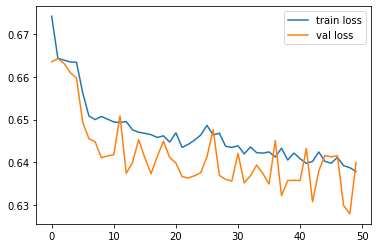

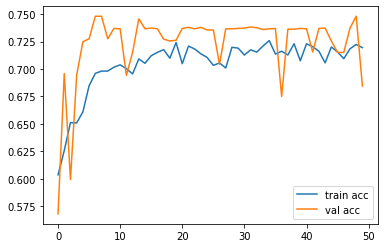

In [322]:
plot_loss_acc(train_losses,val_losses,train_accs,val_accs)

In [323]:
y,predicted, acc = test_model(clinical_model,criterion,test_loader)
results["Clinical Section"]["DL"] = acc

Test | Loss:6.28e-01 | Acc: 0.75|: 100%|██████████| 1/1 [00:00<00:00, 79.75batch/s]


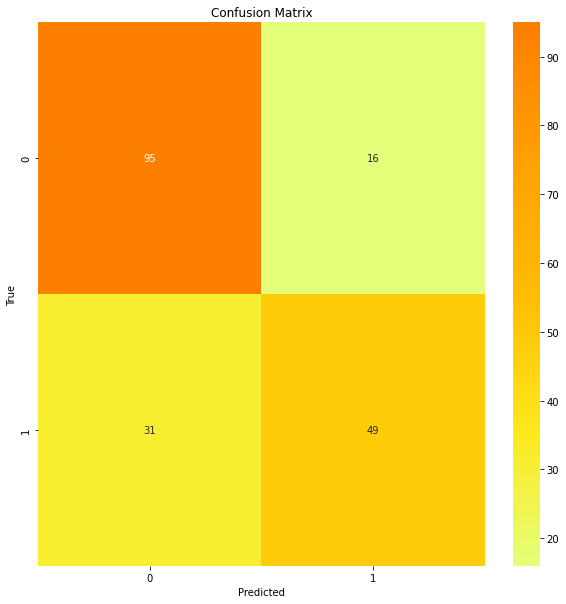

In [324]:
conf_matrix(y,predicted)

# Model Comparison (10 Points)

Compare different models and different datasets (clinical, gene expressions, and gene reduced expressions) and try to explain their differences.

In [325]:
results

{'Clinical Section': {'KNN': 0.7007874015748031,
  'SVM-Linear': 0.7427821522309711,
  'SVM-RBF': 0.7401574803149606,
  'Decision Tree': 0.6902887139107612,
  'Random Forest': 0.7270341207349081,
  'Linear Regression': 0.7375328083989501,
  'Decision Tree Regressor': 0.6797900262467191,
  'Random Forest Regressor': 0.7139107611548556,
  'Logistic Regression': 0.7375328083989501,
  'DL': 0.7539267015706806},
 'Reduced Gene Expression': {'KNN': 0.5616797900262467,
  'SVM-Linear': 0.6141732283464567,
  'SVM-RBF': 0.6456692913385826,
  'Decision Tree': 0.5695538057742782,
  'Random Forest': 0.5853018372703412,
  'Linear Regression': 0.6246719160104987,
  'Decision Tree Regressor': 0.5643044619422573,
  'Random Forest Regressor': 0.6089238845144357,
  'Logistic Regression': 0.6141732283464567,
  'DL': 0.6230366492146597},
 'Not Reduced Gene Expression': {'KNN': 0.6167979002624672,
  'SVM-Linear': 0.6062992125984252,
  'SVM-RBF': 0.6614173228346457,
  'Decision Tree': 0.5538057742782152,
  '

In [326]:
df = pd.DataFrame(results)
df

,Clinical Section,Reduced Gene Expression,Not Reduced Gene Expression,Both Clinical and Gene Reduced Expresssion
KNN,0.700787,0.561680,0.616798,0.679790
SVM-Linear,0.742782,0.614173,0.606299,0.753281
SVM-RBF,0.740157,0.645669,0.661417,0.745407
Decision Tree,0.690289,0.569554,0.553806,0.679790
Random Forest,0.727034,0.585302,0.611549,0.797900
Linear Regression,0.737533,0.624672,0.624672,0.740157
Decision Tree Regressor,0.679790,0.564304,0.582677,0.653543
Random Forest Regressor,0.713911,0.608924,0.635171,0.742782
Logistic Regression,0.737533,0.614173,0.614173,0.740157
DL,0.753927,0.623037,0.685864,0.712042


In [340]:
list(df.iloc[:, 0])

[0.7007874015748031,
 0.7427821522309711,
 0.7401574803149606,
 0.6902887139107612,
 0.7270341207349081,
 0.7375328083989501,
 0.6797900262467191,
 0.7139107611548556,
 0.7375328083989501,
 0.7539267015706806]

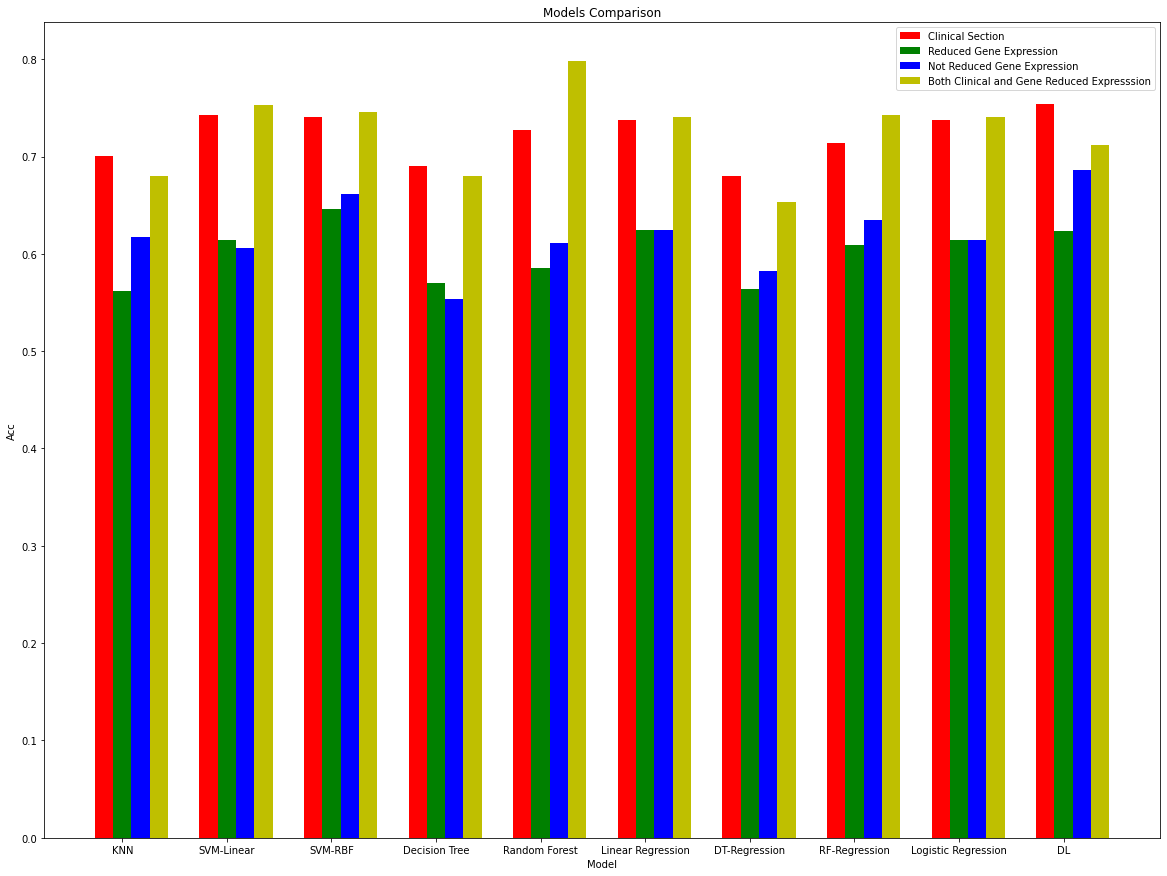

In [353]:
fig = plt.figure(figsize=(20, 15))

N = 10
ind = np.arange(N) 
width = 0.35

xvals1 = list(df.iloc[:, 0])
bar1 = plt.bar(ind*2, xvals1, width, color = 'r')
  
xvals2 = list(df.iloc[:, 1])
bar2 = plt.bar(ind*2+width, xvals2, width, color='g')
  
xvals3 = list(df.iloc[:, 2])
bar3 = plt.bar(ind*2+width*2, xvals3, width, color = 'b')

xvals4 = list(df.iloc[:, 3])
bar4 = plt.bar(ind*2+width*3, xvals4, width, color = 'y')
  
plt.xlabel("Model")
plt.ylabel('Acc')
plt.title("Models Comparison")
  
plt.xticks(ind*2+width, list(results["Clinical Section"].keys())[:6] + ["DT-Regression", 'RF-Regression'] + list(results["Clinical Section"].keys())[8:])
plt.legend( (bar1, bar2, bar3, bar4), ('Clinical Section', 'Reduced Gene Expression', 'Not Reduced Gene Expression', 'Both Clinical and Gene Reduced Expresssion') )
plt.show()

In [355]:
lst = list(results["Clinical Section"].values())
print("clinical:", sum(lst) / len(lst))

lst = list(results["Reduced Gene Expression"].values())
print("Reduced Gene Expression:", sum(lst) / len(lst))

lst = list(results["Not Reduced Gene Expression"].values())
print("Not Reduced Gene Expression:", sum(lst) / len(lst))

lst = list(results["Both Clinical and Gene Reduced Expresssion"].values())
print("Both Clinical and Gene Reduced Expresssion:", sum(lst) / len(lst))

clinical: 0.722374297453656
Reduced Gene Expression: 0.6011488092784213
Not Reduced Gene Expression: 0.6192425554135577
Both Clinical and Gene Reduced Expresssion: 0.7244850283766885


In [358]:
for i in range(10):
  lst = list(df.iloc[i, :])
  print(list(results["Clinical Section"].keys())[i], sum(lst) / len(lst))

KNN 0.639763779527559
SVM-Linear 0.6791338582677166
SVM-RBF 0.6981627296587927
Decision Tree 0.6233595800524934
Random Forest 0.6804461942257218
Linear Regression 0.681758530183727
Decision Tree Regressor 0.6200787401574803
Random Forest Regressor 0.6751968503937007
Logistic Regression 0.6765091863517061
DL 0.6937172774869109


#### best model ####

<br><b> SVM with RBF kernel </b></br>
this model has the best average accuracy on all datasets because it performs the classification in a non-linear way and produces an unlimited number of features. and performs this separation with the largest margin possible.

<br><b> Deep Learning </b></br>
this model has the second average accuracy on all datasets. it is a modern approach for classification problems. and it performs on many datasets with high accuracy and can find many specific features in the data. even though we used a simple neural network architecture, it still has a good accuracy.

<br><b> decision tree regressor  </b></br>
this model has the worst average accuracy on all datasets because it is not a good idea to use regression models for classification problems.and it is not necessarily possible to fit a good line on the data.

#### best dataset ####

<br><b>reduced gene expression</b></br>
this dataset has the worst average accuracy over all models because it has the least number of features and the least amount of information. good part of information has been lost in the dimension reduction process. and it can not meet the required information in the train process.

<br><b> clinical </b></br>
this dataset has a good average accuracy over all models. due to having good amount of information compared to the expression level of genes.because when it comes to cancer detection, some of genes are unimportant and ineffective in the detection process.

<br><b> not reduced gene expression </b></br>
as it mentioned before, this dataset has better average accuracy than the reduced gene expression dataset. because it has more information than the reduced gene expression dataset. but it has less information than the clinical dataset.

br><b> both clinical and reduced gene expression </b></br>
this dataset has the best average accuracy over all models. because it has the most information compared to the other datasets. it uses the information of both clinical and reduced gene expression datasets. so it has the most information to train the model.